# Análisis de supervivencia y modelado predictivo en una cohorte oncológica integración de datos histológicos, variables clínicas y moleculares

## Introducción

Este dataset contiene información clínica y molecular de 95 pacientes oncológicos en una cohorte de validación. Cada fila representa un paciente.

### Columnas principales
- Patient ID: Identificador único, no aporta a modelos directamente pero sirve para trazabilidad.
- Survival time (days): Tiempo de seguimiento hasta evento o censura (variable para análisis de supervivencia).
- Event: Indicador binario (1 = muerte/evento, 0 = vivo/censurado).
- Tumor size (cm): Tamaño del tumor, variable clínica continua.
- Grade (1–3): Diferenciación histológica (1 = bajo, 3 = alto, más agresivo).
- Stage (TNM 8th): Etapa clínica (IA, IB, II, III, IV, Recurrence). Refleja extensión de enfermedad.
- Age: Edad del paciente en años.
- Sex: Masculino / Femenino.
- Cigarette & Pack per year: Información sobre hábito tabáquico (factor de riesgo).
- Type Adjuvant: Tipo de terapia adyuvante recibida (quimio, radio, etc.). Tiene muchos valores ausentes.
- Batch: Lote de muestra/experimento (útil para corregir sesgos técnicos).
- EGFR / KRAS: Estado mutacional (mutado/no mutado). Son biomarcadores moleculares con valores faltantes.

### Objetivo del Proyecto
Este dataset permite desarrollar estudios y modelos en tres grandes líneas:

1. Análisis descriptivo y exploratorio
- Distribuciones de edad, sexo, tabaquismo, mutaciones.
- Comparar supervivencia según Stage, Grade, EGFR/KRAS, o tratamiento adyuvante.
- Detectar patrones en pacientes que sobreviven más o menos tiempo.

2. Modelos de supervivencia
- Kaplan-Meier: comparar curvas de supervivencia entre grupos .
- Cox regression: evaluar efecto de múltiples variables sobre la supervivencia (edad, stage, mutaciones, hábito tabáquico).

3. Modelos predictivos (Machine Learning)
- Predicción de la supervivencia

### TNM
1. Estadio I (IA1, IA2, IA3, IB)
Tumor pequeño, sin ganglios ni metástasis:
- IA1: Tumor ≤1 cm.
- IA2: Tumor >1 a 2 cm.
- IA3: Tumor >2 a 3 cm.
- IB: Tumor >3 a 4 cm (sin ganglios ni metástasis).

Generalmente curable con cirugía.

2. Estadio II (IIA, IIB)
Tumor más grande (4–7 cm) o con cierta invasión local, a veces con ganglios hiliares afectados:
- IIA: Tumor 4–5 cm sin ganglios.
- IIB: Tumor 5–7 cm o con ganglios N1 (peribronquiales/hiliares).

Se trata con cirugía + quimioterapia adyuvante.

3. Estadio III (IIIA, IIIB)
Tumor avanzado localmente, invade estructuras o ganglios mediastínicos:
- IIIA: Ganglios mediastínicos ipsilaterales.
- IIIB: Ganglios mediastínicos contralaterales o afectación de estructuras mayores (p. ej. corazón, grandes vasos).

Aquí la cirugía es difícil; suelen usarse radioquimioterapia.

4. Estadio IV (IVA, IVB)
Cáncer metastásico.
- IVA: Una sola metástasis extratorácica o en pleura/pericardio.
- IVB: Múltiples metástasis a distancia (hueso, hígado, cerebro, etc.).

Se trata principalmente con terapias sistémicas (quimio, inmunoterapia, terapias dirigidas).

5. Recurrence (recurrencia)

Indica que el cáncer volvió después de un tratamiento inicial (local, regional o metastásico).
No es un estadio per se, sino una categoría clínica que depende de la evolución.

### Grado Histólogico

El grado describe qué tan diferenciadas son las células tumorales (qué tanto se parecen a células normales):

1. Grado 1 (bajo grado, bien diferenciado):
- Las células aún se parecen bastante a las normales.
- Suelen crecer más despacio.
- Mejor pronóstico.

2. Grado 2 (intermedio, moderadamente diferenciado):
- Células más anormales.
- Crecimiento más rápido que grado 1.
- Pronóstico intermedio.

3. Grado 3 (alto grado, poco diferenciado o indiferenciado):
- Células muy diferentes a las normales.
- Crecen y se diseminan más rápido.
- Peor pronóstico.

### Modelado
Se contruyeron modelos de arboles de deciciones, Knn y bosques aleatorios. Los modelos de arboles de deciciones y Knn no lograron predecir correctamente más del 68% de los datos de prueba. Por otro lado modelo de bosques aleatorios con 5000 arboles que integro las variables Tamaño del tumor (cm), Grado, Estadio, Sexo, Cantidad por año, EGFR, KRAS, Adyuvante obtuvo un aUC de 0.8, tras optimizar el thresholds logró predecir correctamente el 85% de los verdaderos negativos y el 66.66% de los verdaderos positivos de los datos de prueba. Se intuiye que no se logro crear mejores modelos debido al tamaño del dataset, haciendo falta mas datos para mejores predicciones y al desbalance de los datos, contando con una mayor cantidad de datos negativos que positivos, y a la falta de variables que podrian incluir parte de la variabilidad.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
clinic = pd.read_excel(r'C:\Users\HP\Desktop\Machine learning biociencias\Datos_clinicos\Clinical_Data_Validation_Cohort.xlsx')
clinic.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,Type.Adjuvant,batch,EGFR,KRAS
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,NaN,1,NaN,NaN
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,NaN,1,Negative,Negative
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,NaN,1,Negative,Negative
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,NaN,1,Negative,G12C
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,NaN,1,Negative,Negative


In [3]:
dummies_EGFR = pd.get_dummies(
    clinic['EGFR'],
    prefix='EGFR',
    drop_first=True,
    dtype=int  # <--- aquí fuerzas que sean 0/1 numéricos
    )

df_clinc = pd.concat([clinic, dummies_EGFR['EGFR_Negative']], axis=1)

print(df_clinc.head())

  Patient ID  Survival time (days)  Event (death: 1, alive: 0)  \
0    P109342                  2329                           1   
1    P124450                  2532                           0   
2    P131833                  2271                           0   
3    P131888                  2193                           0   
4    P131946                  2387                           0   

   Tumor size (cm)  Grade Stage (TNM 8th edition)  Age     Sex Cigarette  \
0              2.6      3                      IB   67    Male    Former   
1              3.5      3                      IB   68  Female    Former   
2              2.0      2                     IA2   80  Female     Never   
3              3.0      2                     IA3   63    Male    Former   
4              4.0      2                    IIIA   88  Female     Never   

   Pack per year Type.Adjuvant  batch      EGFR      KRAS  EGFR_Negative  
0           50.0           NaN      1       NaN       NaN              

In [4]:
dummies_KRAS = pd.get_dummies(
    clinic['KRAS'],
    prefix='KRAS',
    drop_first=True,
    dtype=int  # <--- aquí fuerzas que sean 0/1 numéricos
    )
dummies_KRAS.head()

,KRAS_G12C,KRAS_G12D,KRAS_G12F,KRAS_G12R,KRAS_G12V,KRAS_G13C,KRAS_G13D,KRAS_G13F,KRAS_G13R,KRAS_Negative
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [5]:
df_clinc = pd.concat([df_clinc, dummies_KRAS['KRAS_Negative']], axis=1)
df_clinc.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,Type.Adjuvant,batch,EGFR,KRAS,EGFR_Negative,KRAS_Negative
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,NaN,1,NaN,NaN,0,0
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,NaN,1,Negative,Negative,1,1
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,NaN,1,Negative,Negative,1,1
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,NaN,1,Negative,G12C,1,0
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,NaN,1,Negative,Negative,1,1


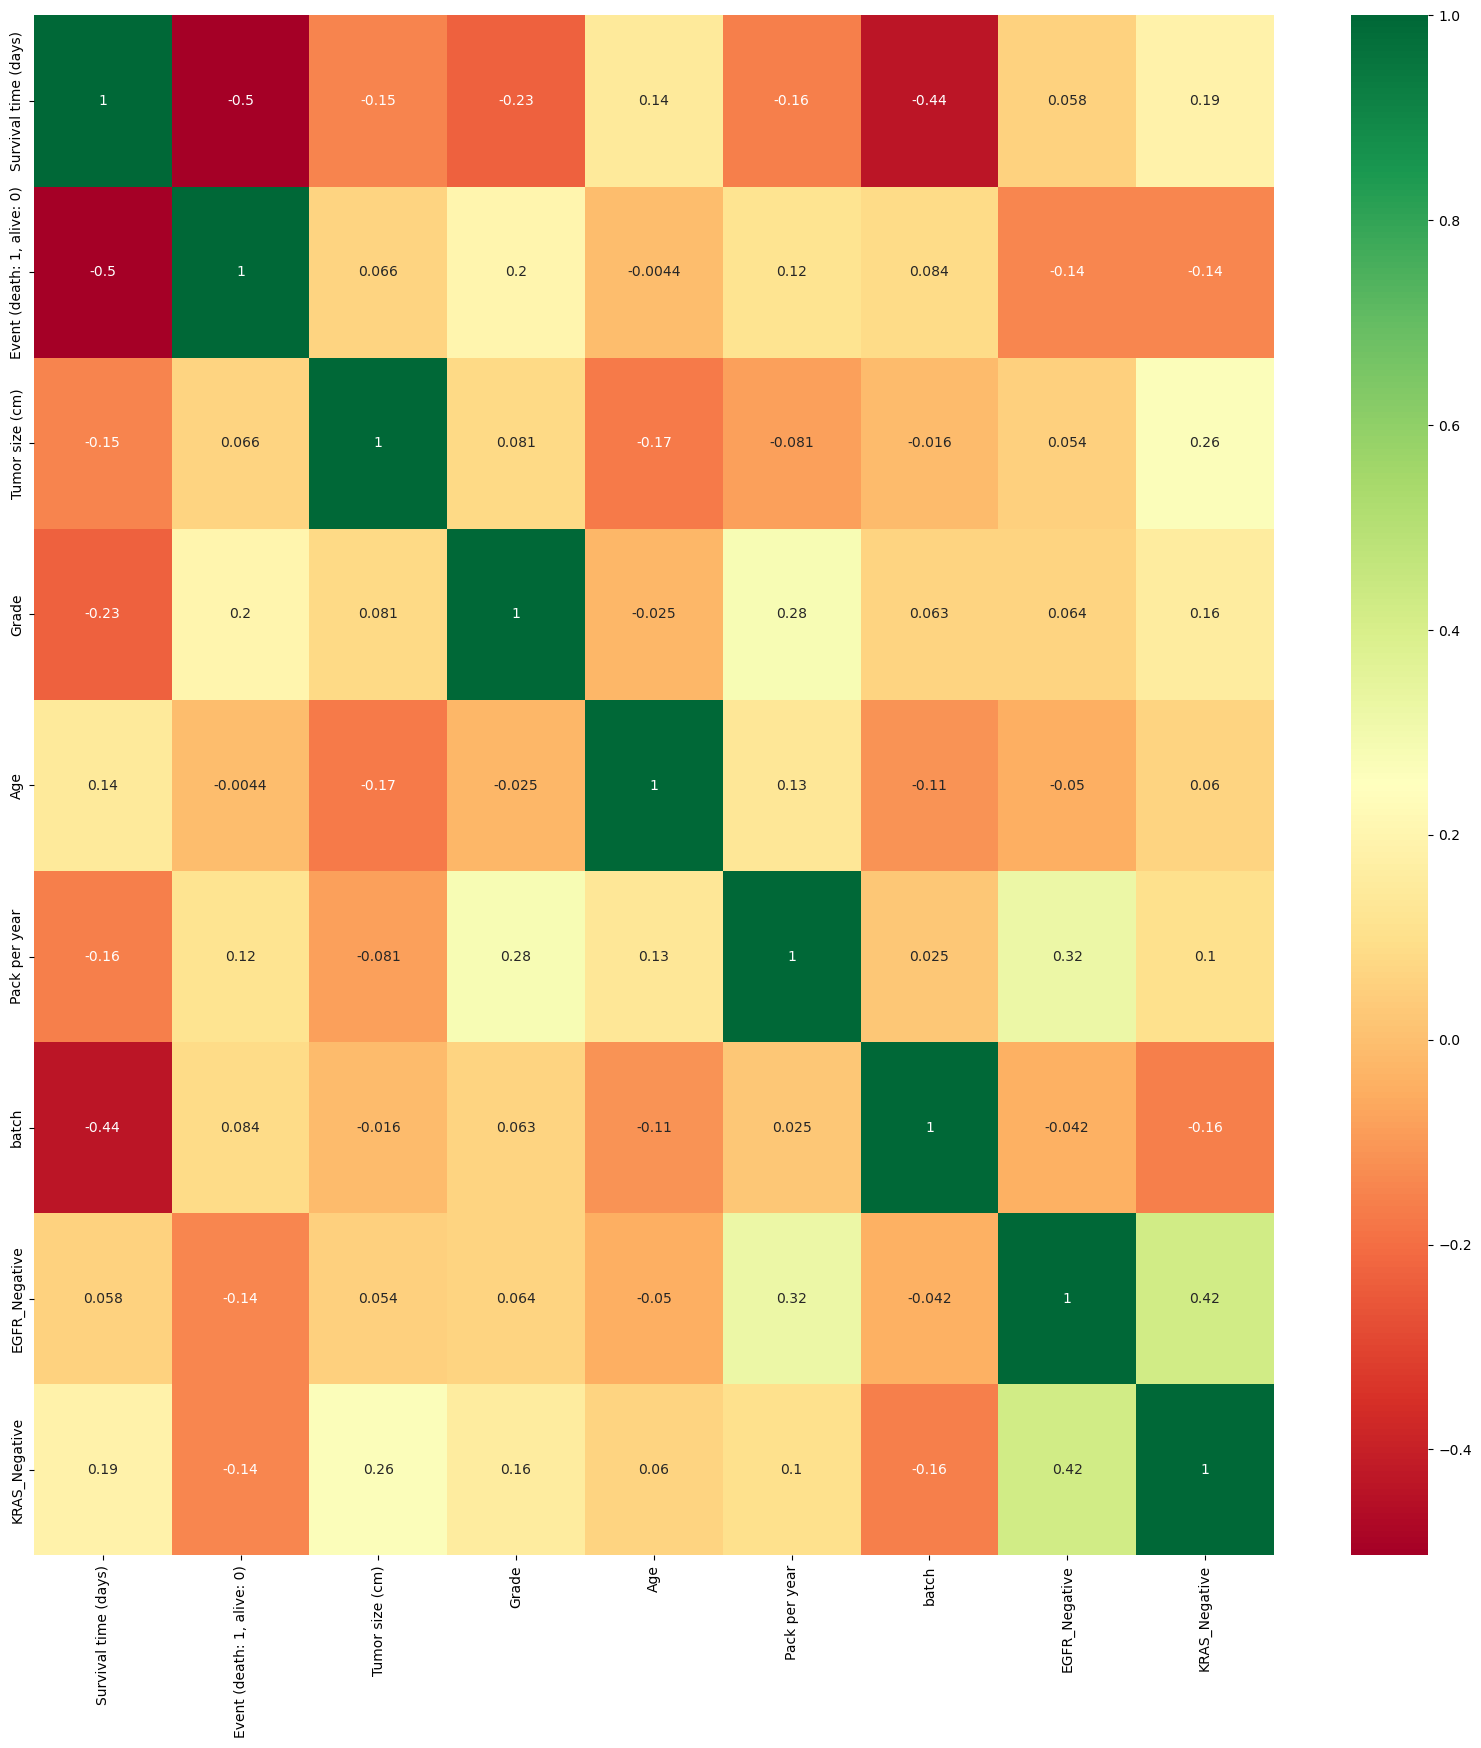

In [6]:
numeric_cols = df_clinc.select_dtypes(include=['number'])
columnas = numeric_cols.columns

correlation_matrix_m = df_clinc[columnas].corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation_matrix_m, cmap= 'RdYlGn', annot =True)
plt.show()

# Primer conclucion
Las caracteristicas que presentaron una mayor correlacion al timpo de supervivencia fueron el grado histologico, las mutaciones en EGFR y KRAS y el numero de paquetes de cigarros al año. Las mutaciones en EGFR y KRASpresentaron una correlacion negativa devido a que solo se evaluo la ausencia de mutaciones en estos genes (Donde 1 es negativo), esto para facilitar este analisis, sin embargo, es posible que esta correlacion sea mayor al tomar encuenta los distintos tipos de mutaciones, dado que algunas de estas mutaciones podrian ser benignas, neutrales o patogenica, al engolobarse por completo estos tres tipos de mutaciones en una sola categoria podria alterar los resultados, para estudios posteriores se tomara en cuenta esto.

In [7]:
clinic.shape

(95, 14)

In [8]:
clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient ID                  95 non-null     object 
 1   Survival time (days)        95 non-null     int64  
 2   Event (death: 1, alive: 0)  95 non-null     int64  
 3   Tumor size (cm)             95 non-null     float64
 4   Grade                       95 non-null     int64  
 5   Stage (TNM 8th edition)     95 non-null     object 
 6   Age                         95 non-null     int64  
 7   Sex                         95 non-null     object 
 8   Cigarette                   95 non-null     object 
 9   Pack per year               95 non-null     float64
 10  Type.Adjuvant               22 non-null     object 
 11  batch                       95 non-null     int64  
 12  EGFR                        86 non-null     object 
 13  KRAS                        65 non-nu

In [9]:
clinic['Type.Adjuvant'].unique()

array([nan, 'Chemo', 'Chemorad', 'XRT'], dtype=object)

In [10]:
# Se remplazan los valores nulos en Type.Adjuvant como None, se sospecha que los valores nulos corresponden a pacientes que recibieron tratamiento
clinic['Type.Adjuvant'] = clinic['Type.Adjuvant'].fillna('None')
clinic.groupby(['Type.Adjuvant', 'Event (death: 1, alive: 0)'])['Event (death: 1, alive: 0)'].count()

Type.Adjuvant  Event (death: 1, alive: 0)
Chemo          0                             10
               1                              7
Chemorad       1                              4
None           0                             46
               1                             27
XRT            1                              1
Name: Event (death: 1, alive: 0), dtype: int64

In [11]:
datos_none = clinic[clinic['Type.Adjuvant'] == 'None']
print(datos_none['Grade'].unique(), datos_none['Stage (TNM 8th edition)'].unique())

[3 2 1] ['IB' 'IA2' 'IA3' 'IIIA' 'Recurrence' 'IIIB' 'IIB' 'IIA']


In [12]:
datos_none.groupby(['Grade', 'Event (death: 1, alive: 0)'])['Event (death: 1, alive: 0)'].count()

Grade  Event (death: 1, alive: 0)
1      0                              4
       1                              2
2      0                             26
       1                             11
3      0                             16
       1                             14
Name: Event (death: 1, alive: 0), dtype: int64

In [13]:
datos_none.groupby(['Stage (TNM 8th edition)', 'Event (death: 1, alive: 0)'])['Event (death: 1, alive: 0)'].count()

Stage (TNM 8th edition)  Event (death: 1, alive: 0)
IA2                      0                             12
                         1                              8
IA3                      0                             14
                         1                              2
IB                       0                             13
                         1                              6
IIA                      1                              1
IIB                      0                              3
                         1                              3
IIIA                     0                              3
                         1                              4
IIIB                     1                              1
Recurrence               0                              1
                         1                              2
Name: Event (death: 1, alive: 0), dtype: int64

In [14]:
clinic.nunique()

Patient ID                    95
Survival time (days)          89
Event (death: 1, alive: 0)     2
Tumor size (cm)               35
Grade                          3
Stage (TNM 8th edition)        9
Age                           35
Sex                            2
Cigarette                      3
Pack per year                 45
Type.Adjuvant                  4
batch                          3
EGFR                           7
KRAS                          11
dtype: int64

In [15]:
clinic.describe()

,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Age,Pack per year,batch
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,1471.515789,0.410526,2.854737,2.368421,66.589474,29.253684,2.431579
std,681.642133,0.494539,1.365281,0.602347,9.698097,26.205783,0.807579
min,50.000000,0.000000,1.100000,1.000000,48.000000,0.000000,1.000000
25%,898.500000,0.000000,2.000000,2.000000,60.000000,2.125000,2.000000
50%,1760.000000,0.000000,2.400000,2.000000,67.000000,25.000000,3.000000
75%,1981.000000,1.000000,3.500000,3.000000,72.500000,45.000000,3.000000
max,2532.000000,1.000000,7.000000,3.000000,88.000000,105.000000,3.000000


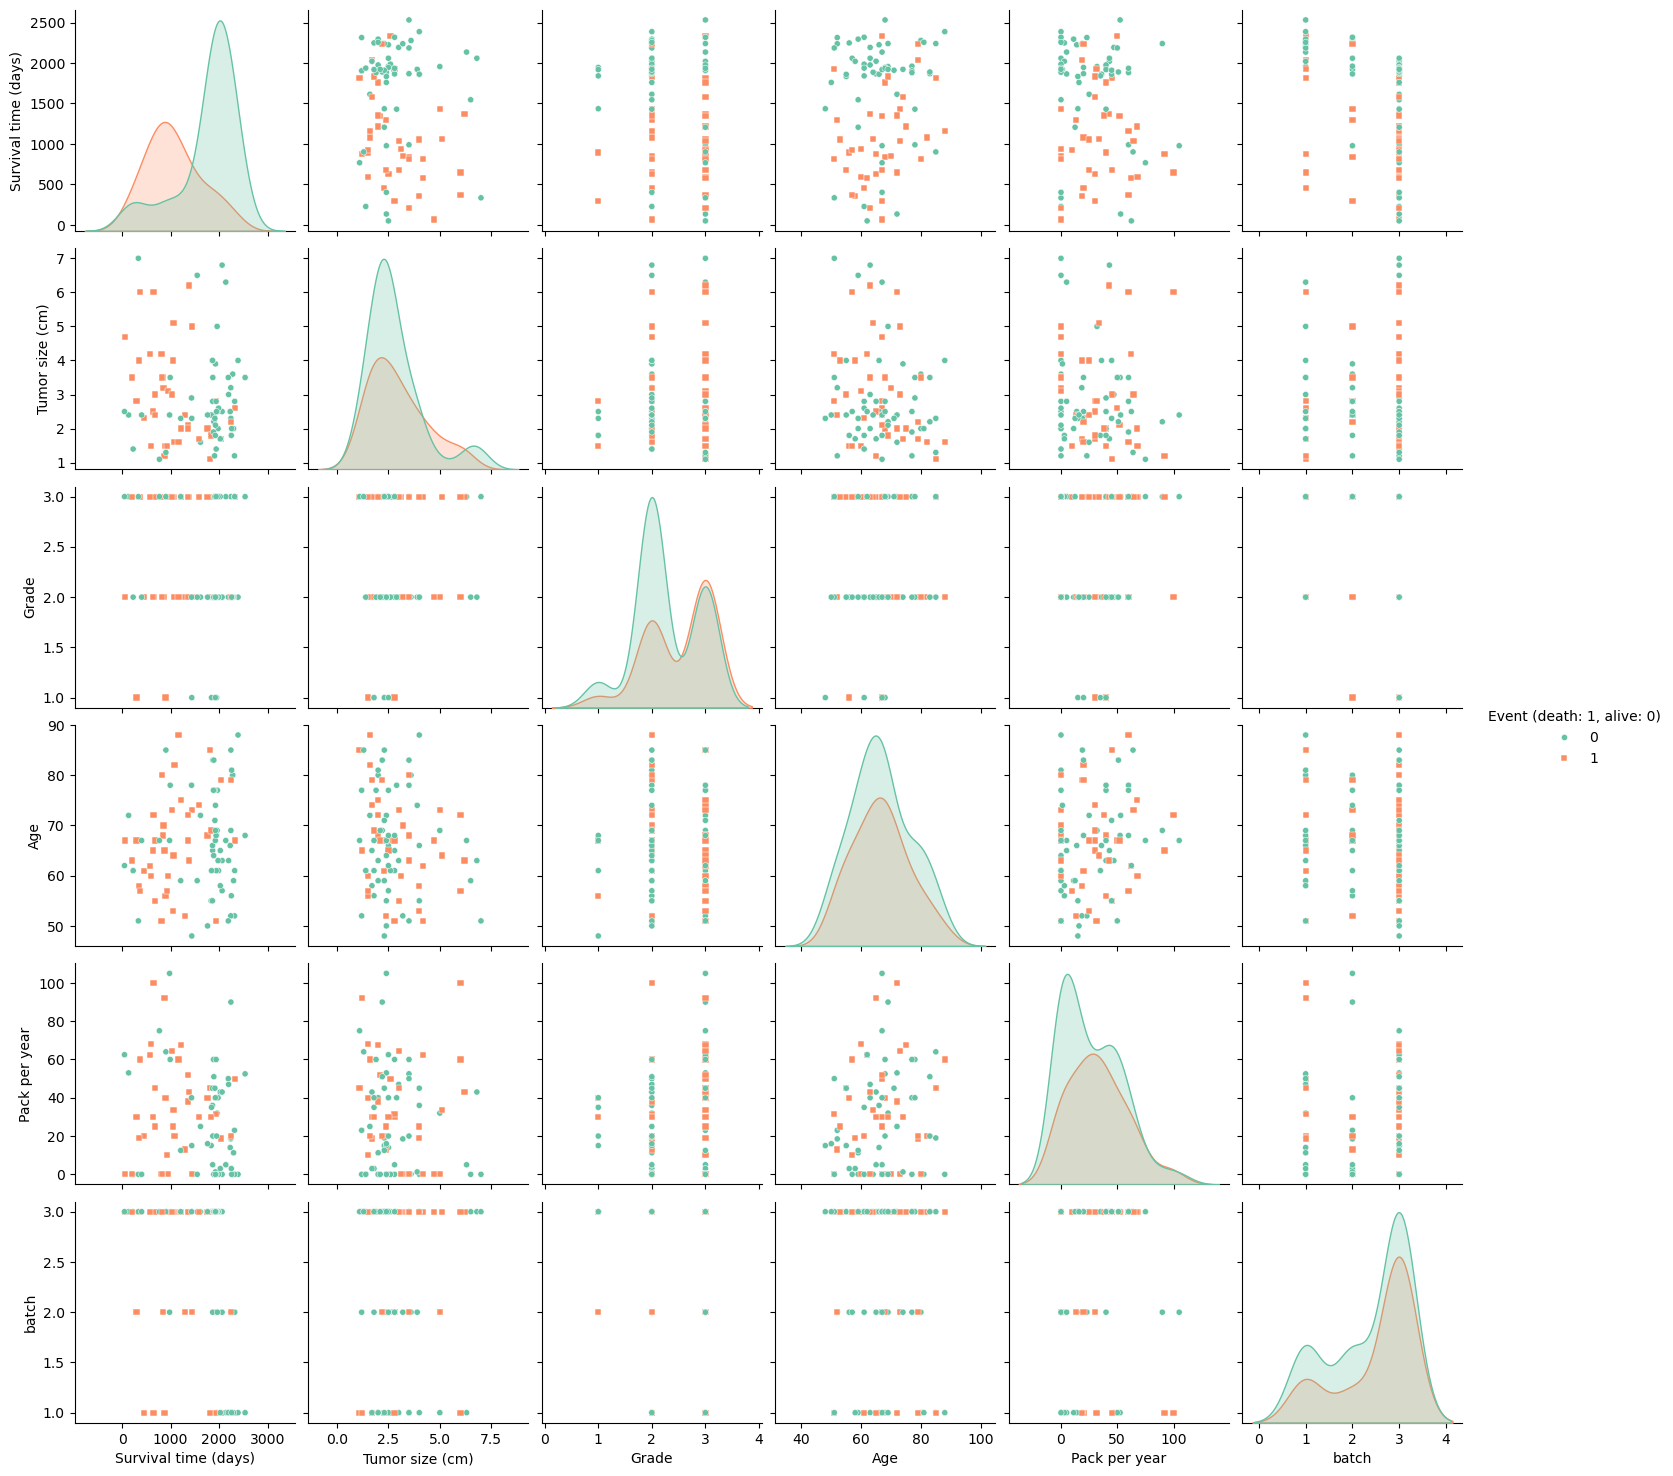

In [16]:
sns.pairplot(clinic, hue='Event (death: 1, alive: 0)', markers=["o", "s"],  plot_kws={"s": 20}, palette="Set2")

In [17]:
clinic.columns

Index(['Patient ID', 'Survival time (days)', 'Event (death: 1, alive: 0)',
       'Tumor size (cm)', 'Grade', 'Stage (TNM 8th edition)', 'Age', 'Sex',
       'Cigarette', 'Pack per year', 'Type.Adjuvant', 'batch', 'EGFR', 'KRAS'],
      dtype='object')

In [18]:
def grafica(x, y, n1,n2):
    graf = clinic.groupby(x)[y].nunique().reset_index()
    return (sns.barplot(data=graf, x=x, y=y, ax=axs[n1,n2]),
    axs[n1,n2].legend(bbox_to_anchor=(1, 0.2), loc='upper left'),
    axs[n1,n2].set_title(f'frecuencia de {x}'))

C:\Users\HP\AppData\Local\Temp\ipykernel_5880\248315123.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[n1,n2].legend(bbox_to_anchor=(1, 0.2), loc='upper left'),
C:\Users\HP\AppData\Local\Temp\ipykernel_5880\248315123.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[n1,n2].legend(bbox_to_anchor=(1, 0.2), loc='upper left'),
C:\Users\HP\AppData\Local\Temp\ipykernel_5880\248315123.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[n1,n2].legend(bbox_to_anchor=(1, 0.2), loc='upper left'),
C:\Users\HP\AppData\Local\Temp\ipykernel_5880\2018297343.py:7: UserWarning: set_ticklabels() should only be used

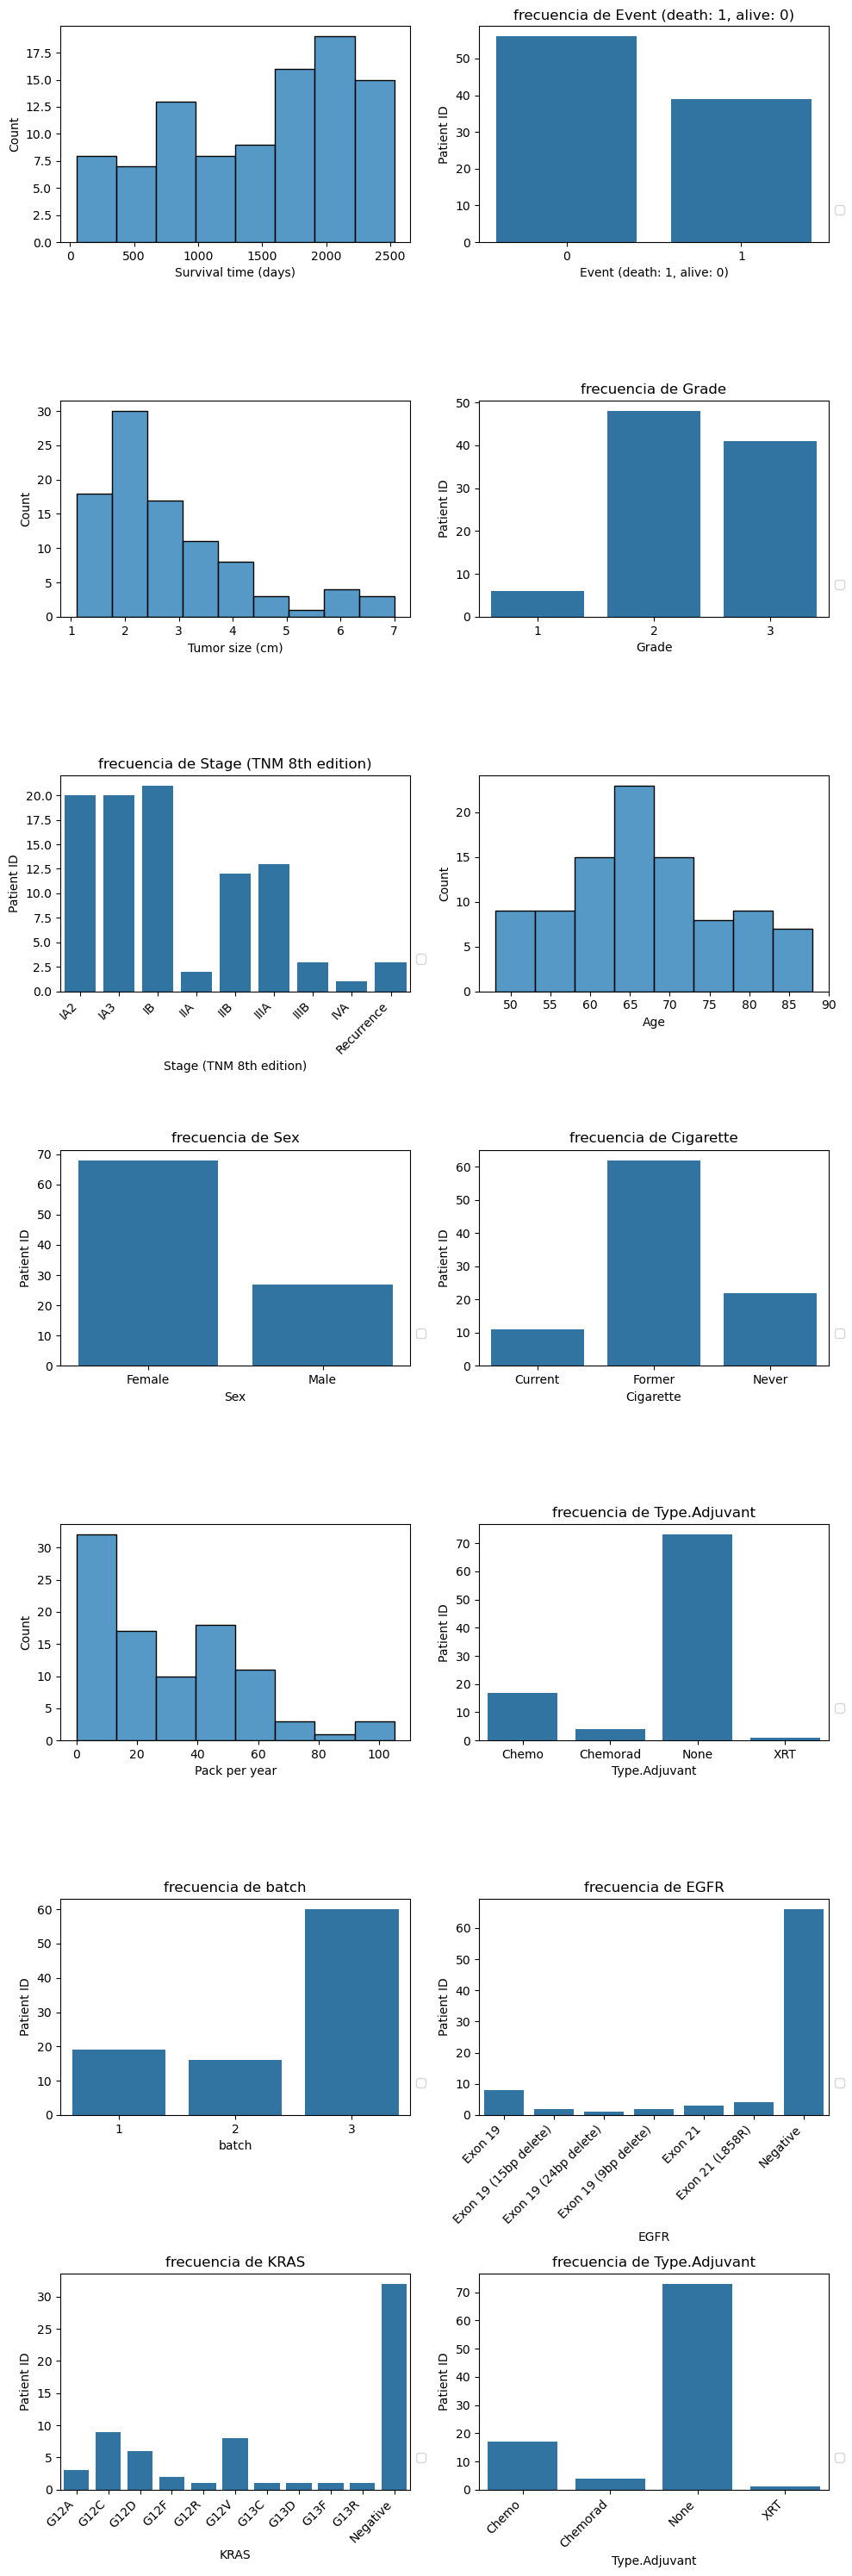

In [19]:
figure, axs = plt.subplots( 7,2, sharey=False, sharex=False, figsize=(10, 30))
sns.histplot(clinic['Survival time (days)'], ax=axs[0,0])
grafica('Event (death: 1, alive: 0)', 'Patient ID', 0,1)
sns.histplot(clinic['Tumor size (cm)'], ax=axs[1,0])
grafica('Grade', 'Patient ID', 1,1)
grafica('Stage (TNM 8th edition)', 'Patient ID', 2,0)
axs[2,0].set_xticklabels(axs[2,0].get_xticklabels(), rotation=45, ha='right')
sns.histplot(clinic['Age'], ax=axs[2,1])
grafica('Sex', 'Patient ID', 3,0)
grafica('Cigarette', 'Patient ID', 3,1)
sns.histplot(clinic['Pack per year'], ax=axs[4,0])
grafica('Type.Adjuvant', 'Patient ID', 4,1)
grafica('batch', 'Patient ID', 5,0)
grafica('EGFR', 'Patient ID', 5,1)
axs[5,1].set_xticklabels(axs[5,1].get_xticklabels(), rotation=45, ha='right')
grafica('KRAS', 'Patient ID', 6,0)
axs[6,0].set_xticklabels(axs[6,0].get_xticklabels(), rotation=45, ha='right')
grafica('Type.Adjuvant', 'Patient ID', 6,1)
axs[6,1].set_xticklabels(axs[6,1].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()
            

Text(0.5, 1.0, 'Supervivencia vs genero')

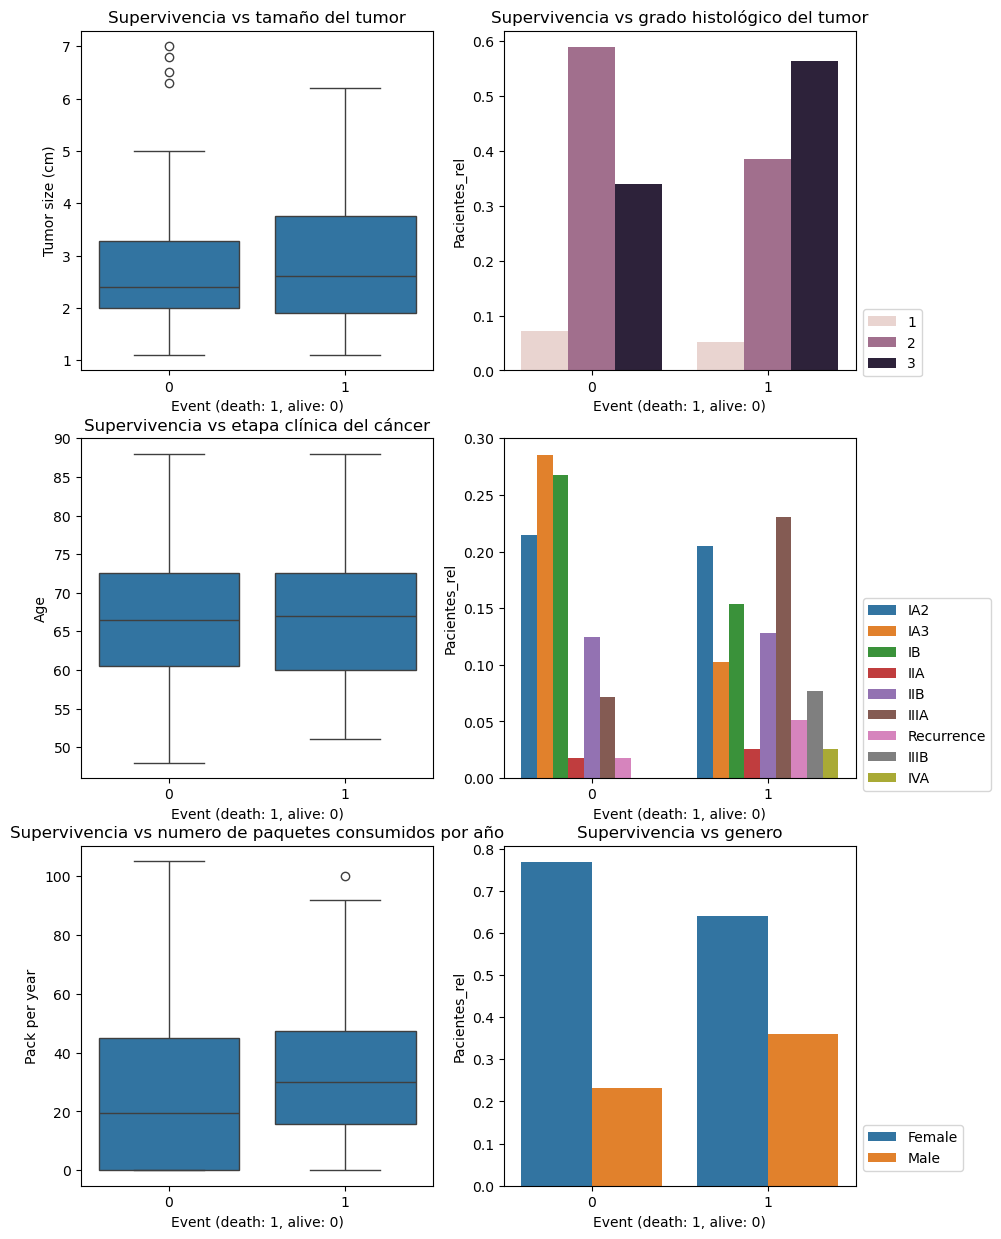

In [20]:
event_grade = clinic.groupby(['Event (death: 1, alive: 0)', 'Grade'])["Patient ID"].nunique().reset_index()
event_grade.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
event_grade_rel = event_grade.copy()
event_grade_rel['Pacientes_rel'] = event_grade_rel.groupby('Event (death: 1, alive: 0)')['Pacientes'].transform(lambda x: x / x.sum())

event_stage = clinic.groupby(['Event (death: 1, alive: 0)', 'Stage (TNM 8th edition)'])["Patient ID"].nunique().reset_index()
event_stage.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
event_stage_rel = event_stage.copy()
event_stage_rel['Pacientes_rel'] = event_stage_rel.groupby('Event (death: 1, alive: 0)')['Pacientes'].transform(lambda x: x / x.sum())

event_gen = clinic.groupby(['Event (death: 1, alive: 0)', 'Sex'])["Patient ID"].nunique().reset_index()
event_gen.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
event_gen_rel = event_gen.copy()
event_gen_rel['Pacientes_rel'] = event_gen_rel.groupby('Event (death: 1, alive: 0)')['Pacientes'].transform(lambda x: x / x.sum())

figure, axs = plt.subplots( 3,2, sharey=False, sharex=False, figsize=(10, 15))

sns.boxplot(x=clinic['Event (death: 1, alive: 0)'], y=clinic['Tumor size (cm)'], ax=axs[0,0])
axs[0,0].set_title('Supervivencia vs tamaño del tumor')

# Gráfica de barras
sns.barplot(data=event_grade_rel, x='Event (death: 1, alive: 0)', y="Pacientes_rel", hue = 'Grade', ax=axs[0,1])
axs[0,1].legend(bbox_to_anchor=(1, 0.2), loc='upper left')
axs[0,1].set_title('Supervivencia vs grado histológico del tumor')

sns.barplot(data=event_stage_rel, x='Event (death: 1, alive: 0)', y="Pacientes_rel", hue = 'Stage (TNM 8th edition)', ax=axs[1,1])
axs[1,1].legend(bbox_to_anchor=(1, 0.55), loc='upper left')

sns.boxplot(x=clinic['Event (death: 1, alive: 0)'], y=clinic['Age'], ax=axs[1,0])
axs[1,0].set_title('Supervivencia vs etapa clínica del cáncer')

sns.boxplot(x=clinic['Event (death: 1, alive: 0)'], y=clinic['Pack per year'], ax=axs[2,0])
axs[2,0].set_title('Supervivencia vs numero de paquetes consumidos por año')

sns.barplot(data=event_gen_rel, x='Event (death: 1, alive: 0)', y="Pacientes_rel", hue = 'Sex', ax=axs[2,1])
axs[2,1].legend(bbox_to_anchor=(1, 0.2), loc='upper left')
axs[2,1].set_title('Supervivencia vs genero')



In [21]:
clinic.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,Type.Adjuvant,batch,EGFR,KRAS
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,None,1,NaN,NaN
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,None,1,Negative,Negative
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,None,1,Negative,Negative
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,None,1,Negative,G12C
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,None,1,Negative,Negative


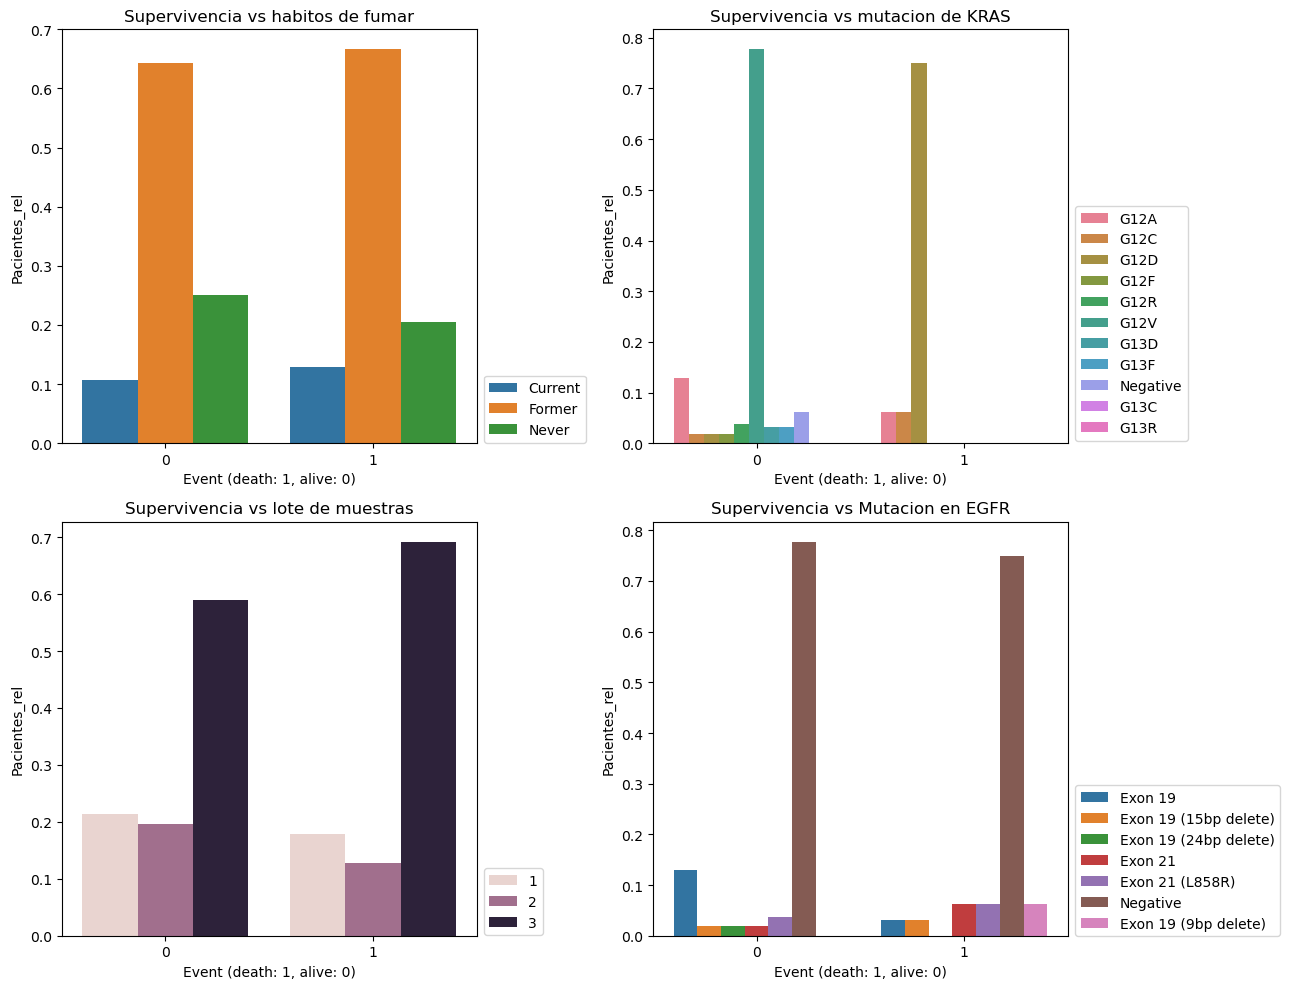

In [22]:
event_fum = clinic.groupby(['Event (death: 1, alive: 0)', 'Cigarette'])["Patient ID"].nunique().reset_index()
event_fum.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
event_fum_rel = event_fum.copy()
event_fum_rel['Pacientes_rel'] = event_fum_rel.groupby('Event (death: 1, alive: 0)')['Pacientes'].transform(lambda x: x / x.sum())

event_batch = clinic.groupby(['Event (death: 1, alive: 0)', 'batch'])["Patient ID"].nunique().reset_index()
event_batch.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
event_batch_rel = event_batch.copy()
event_batch_rel['Pacientes_rel'] = event_batch_rel.groupby('Event (death: 1, alive: 0)')['Pacientes'].transform(lambda x: x / x.sum())

event_EGFR = clinic.groupby(['Event (death: 1, alive: 0)', 'EGFR'])["Patient ID"].nunique().reset_index()
event_EGFR.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
event_EGFR_rel = event_EGFR.copy()
event_EGFR_rel['Pacientes_rel'] = event_EGFR_rel.groupby('Event (death: 1, alive: 0)')['Pacientes'].transform(lambda x: x / x.sum())

event_KRAS = clinic.groupby(['Event (death: 1, alive: 0)', 'KRAS'])["Patient ID"].nunique().reset_index()
event_KRAS.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
event_KRAS_rel = event_KRAS.copy()
event_KRAS_rel['Pacientes_rel'] = event_EGFR_rel.groupby('Event (death: 1, alive: 0)')['Pacientes'].transform(lambda x: x / x.sum())

figure, axs = plt.subplots( 2,2, sharey=False, sharex=False, figsize=(13, 10))

sns.barplot(data=event_KRAS_rel, x='Event (death: 1, alive: 0)', y="Pacientes_rel", hue = 'KRAS', ax=axs[0,1])
axs[0,1].legend(bbox_to_anchor=(1, 0.59), loc='upper left')
axs[0,1].set_title('Supervivencia vs mutacion de KRAS')

# Gráfica de barras
sns.barplot(data=event_fum_rel, x='Event (death: 1, alive: 0)', y="Pacientes_rel", hue = 'Cigarette', ax=axs[0,0])
axs[0,0].legend(bbox_to_anchor=(1, 0.18), loc='upper left')
axs[0,0].set_title('Supervivencia vs habitos de fumar')

sns.barplot(data=event_batch_rel, x='Event (death: 1, alive: 0)', y="Pacientes_rel", hue = 'batch', ax=axs[1,0])
axs[1,0].legend(bbox_to_anchor=(1, 0.18), loc='upper left')
axs[1,0].set_title('Supervivencia vs lote de muestras')

sns.barplot(data=event_EGFR_rel, x='Event (death: 1, alive: 0)', y="Pacientes_rel", hue = 'EGFR', ax=axs[1,1])
axs[1,1].legend(bbox_to_anchor=(1, 0.38), loc='upper left')
axs[1,1].set_title('Supervivencia vs Mutacion en EGFR')
plt.tight_layout()
plt.show()

In [23]:
def graf2(x, n1,n2):
    graf_2 = clinic.groupby([x, 'Event (death: 1, alive: 0)'])["Patient ID"].nunique().reset_index()
    graf_2.rename(columns={"Patient ID": "Pacientes"}, inplace=True)
    
    return (sns.barplot(data=graf_2, x=x, y="Pacientes", hue = 'Event (death: 1, alive: 0)', ax=axs[n1,n2]),
    axs[n1,n2].legend(bbox_to_anchor=(1, 0.59), loc='upper left'),
    axs[n1,n2].set_title(f'{x} vs Supervivencia'),
    axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right'))

In [24]:
clinic.columns

Index(['Patient ID', 'Survival time (days)', 'Event (death: 1, alive: 0)',
       'Tumor size (cm)', 'Grade', 'Stage (TNM 8th edition)', 'Age', 'Sex',
       'Cigarette', 'Pack per year', 'Type.Adjuvant', 'batch', 'EGFR', 'KRAS'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_5880\1263658329.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right'))
C:\Users\HP\AppData\Local\Temp\ipykernel_5880\1263658329.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right'))
C:\Users\HP\AppData\Local\Temp\ipykernel_5880\1263658329.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right'))
C:\Users\HP\AppData\Local\Temp\ipykernel_5880\1263658329.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usi

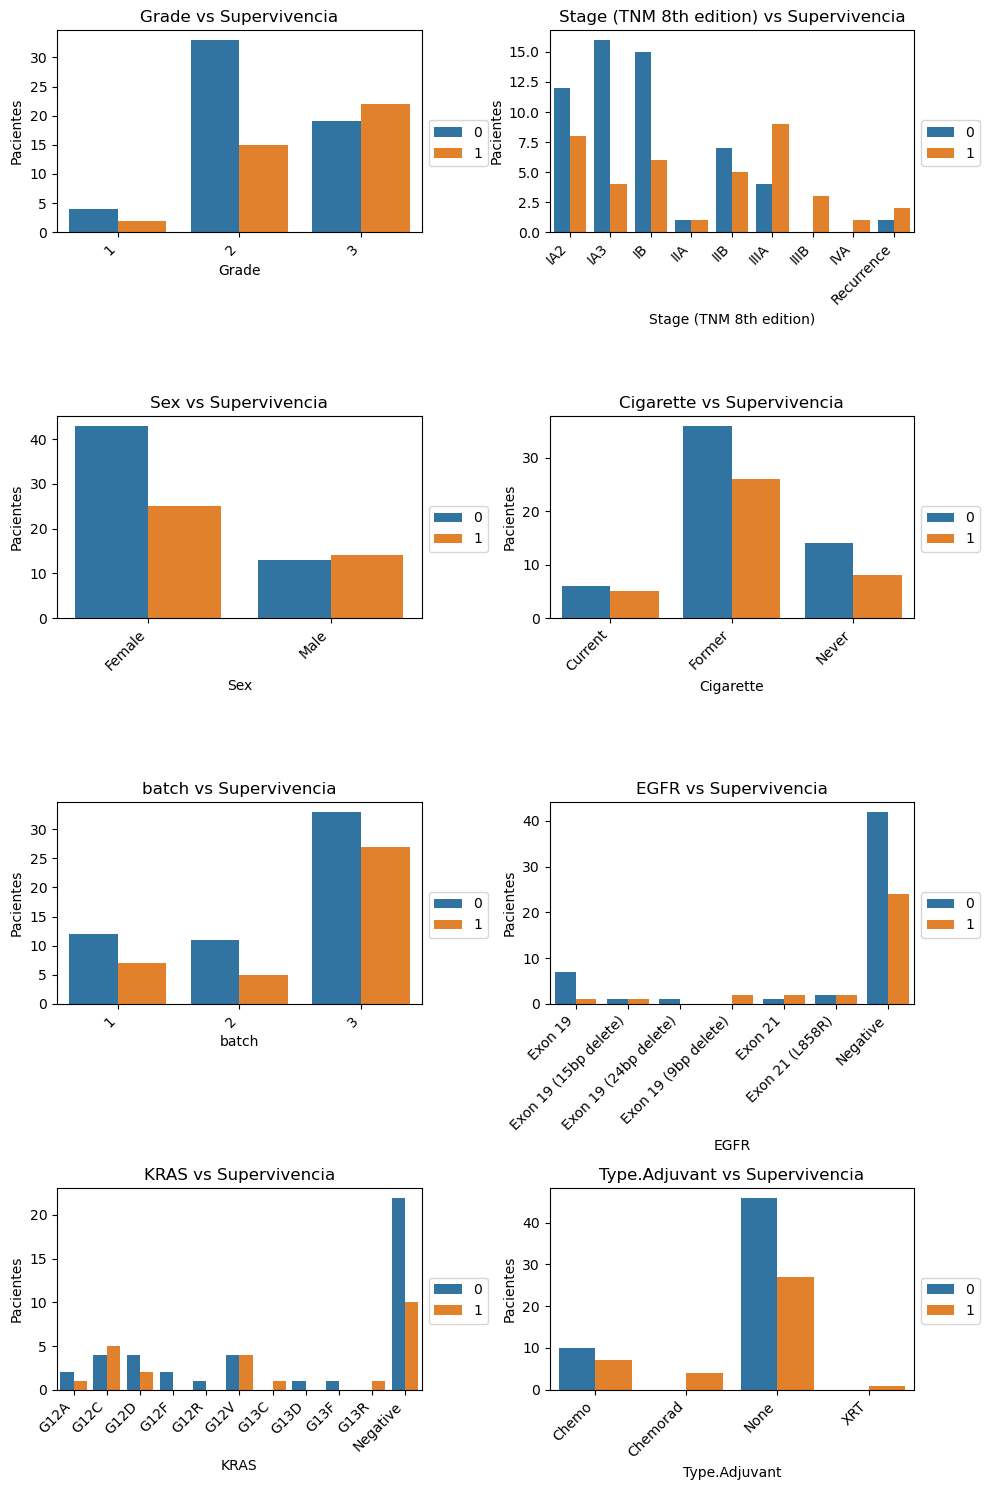

In [25]:
figure, axs = plt.subplots( 4,2, sharey=False, sharex=False, figsize=(10, 15))

graf2('Grade', 0, 0)
graf2('Stage (TNM 8th edition)', 0,1)
graf2('Sex', 1,0)
graf2('Cigarette', 1,1)
graf2('batch', 2,0)
graf2('EGFR', 2,1)
graf2('KRAS', 3,0)
graf2('Type.Adjuvant', 3,1)
plt.tight_layout()
plt.show()

In [26]:
clinic['Stage (TNM 8th edition)'].unique()

array(['IB', 'IA2', 'IA3', 'IIIA', 'IIA', 'Recurrence', 'IIB', 'IVA',
       'IIIB'], dtype=object)

In [27]:
clinic.groupby('Event (death: 1, alive: 0)')["Patient ID"].count()

Event (death: 1, alive: 0)
0    56
1    39
Name: Patient ID, dtype: int64

In [28]:
clinic.groupby(['KRAS', 'Event (death: 1, alive: 0)'])["Patient ID"].count()

KRAS      Event (death: 1, alive: 0)
G12A      0                              2
          1                              1
G12C      0                              4
          1                              5
G12D      0                              4
          1                              2
G12F      0                              2
G12R      0                              1
G12V      0                              4
          1                              4
G13C      1                              1
G13D      0                              1
G13F      0                              1
G13R      1                              1
Negative  0                             22
          1                             10
Name: Patient ID, dtype: int64

## Procesamiento de datos faltantes con imputacion iterativa

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder

In [30]:
clinic_d = clinic.drop('Type.Adjuvant', axis=1)
# Paso 1: seleccionar las columnas
df_encoded = clinic_d[['EGFR', 'KRAS']].copy()

# Paso 2: codificar categorías
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
df_encoded[['EGFR','KRAS']] = encoder.fit_transform(df_encoded)

# Paso 3: imputar valores faltantes
imp = IterativeImputer(random_state=0, max_iter=10)
df_imputed = imp.fit_transform(df_encoded)

# Paso 4: devolver a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=['EGFR','KRAS'])

# Paso 5: opcional, convertir de nuevo a categorías originales
df_imputed[['EGFR','KRAS']] = encoder.inverse_transform(df_imputed)

df_imputed.head()

,EGFR,KRAS
0,Exon 21 (L858R),G13C
1,Negative,Negative
2,Negative,Negative
3,Negative,G12C
4,Negative,Negative


In [31]:
clinic.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,Type.Adjuvant,batch,EGFR,KRAS
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,None,1,NaN,NaN
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,None,1,Negative,Negative
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,None,1,Negative,Negative
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,None,1,Negative,G12C
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,None,1,Negative,Negative


In [32]:
df_imputed.groupby('EGFR').count()

,KRAS
EGFR,
Exon 19,8
Exon 19 (15bp delete),2
Exon 19 (24bp delete),1
Exon 19 (9bp delete),2
Exon 21,3
Exon 21 (L858R),13
Negative,66


In [33]:
df_imputed.groupby('KRAS').count()

,EGFR
KRAS,
G12A,3
G12C,9
G12D,6
G12F,2
G12R,1
G12V,8
G13C,31
G13D,1
G13F,1


In [34]:
clinic_d = clinic_d.drop(['EGFR','KRAS'], axis=1)

In [35]:
clinic_d = pd.concat([clinic_d, df_imputed], axis=1)

In [36]:
clinic_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient ID                  95 non-null     object 
 1   Survival time (days)        95 non-null     int64  
 2   Event (death: 1, alive: 0)  95 non-null     int64  
 3   Tumor size (cm)             95 non-null     float64
 4   Grade                       95 non-null     int64  
 5   Stage (TNM 8th edition)     95 non-null     object 
 6   Age                         95 non-null     int64  
 7   Sex                         95 non-null     object 
 8   Cigarette                   95 non-null     object 
 9   Pack per year               95 non-null     float64
 10  batch                       95 non-null     int64  
 11  EGFR                        95 non-null     object 
 12  KRAS                        95 non-null     object 
dtypes: float64(2), int64(5), object(6)
me

## Análisis de supervivencia Kaplan-Meier

In [37]:
from lifelines import KaplanMeierFitter

In [38]:
T = clinic['Survival time (days)']   # tiempo de supervivencia
E = clinic['Event (death: 1, alive: 0)']     

In [39]:
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 95 total observations, 56 right-censored observations>

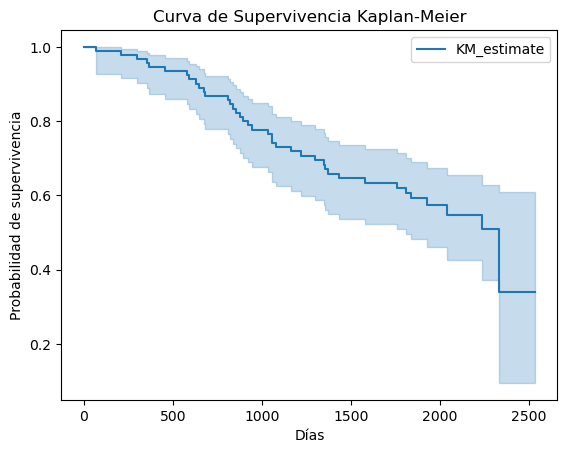

In [40]:
kmf.plot_survival_function()
plt.title('Curva de Supervivencia Kaplan-Meier')
plt.xlabel('Días')
plt.ylabel('Probabilidad de supervivencia')
plt.show()

In [41]:
# Funcion comparativa de supervivencia en grupos
def curva_supervivencia(x, ax=None):
    grades = clinic_d[x].unique()

    if ax is None:
        fig, ax = plt.subplots(figsize=(8,5))  # crea figura solo si no se pasa un eje

    for g in grades:
        mask = clinic_d[x] == g
        kmf.fit(T[mask], event_observed=E[mask], label=f'{x} {g}')
        kmf.plot_survival_function(ax=ax)

    ax.set_title(f'Supervivencia según {x} del tumor')
    ax.set_xlabel('Días')
    ax.set_ylabel('Probabilidad de supervivencia')
    ax.legend(bbox_to_anchor=(1, 0.59), loc='upper left')
    

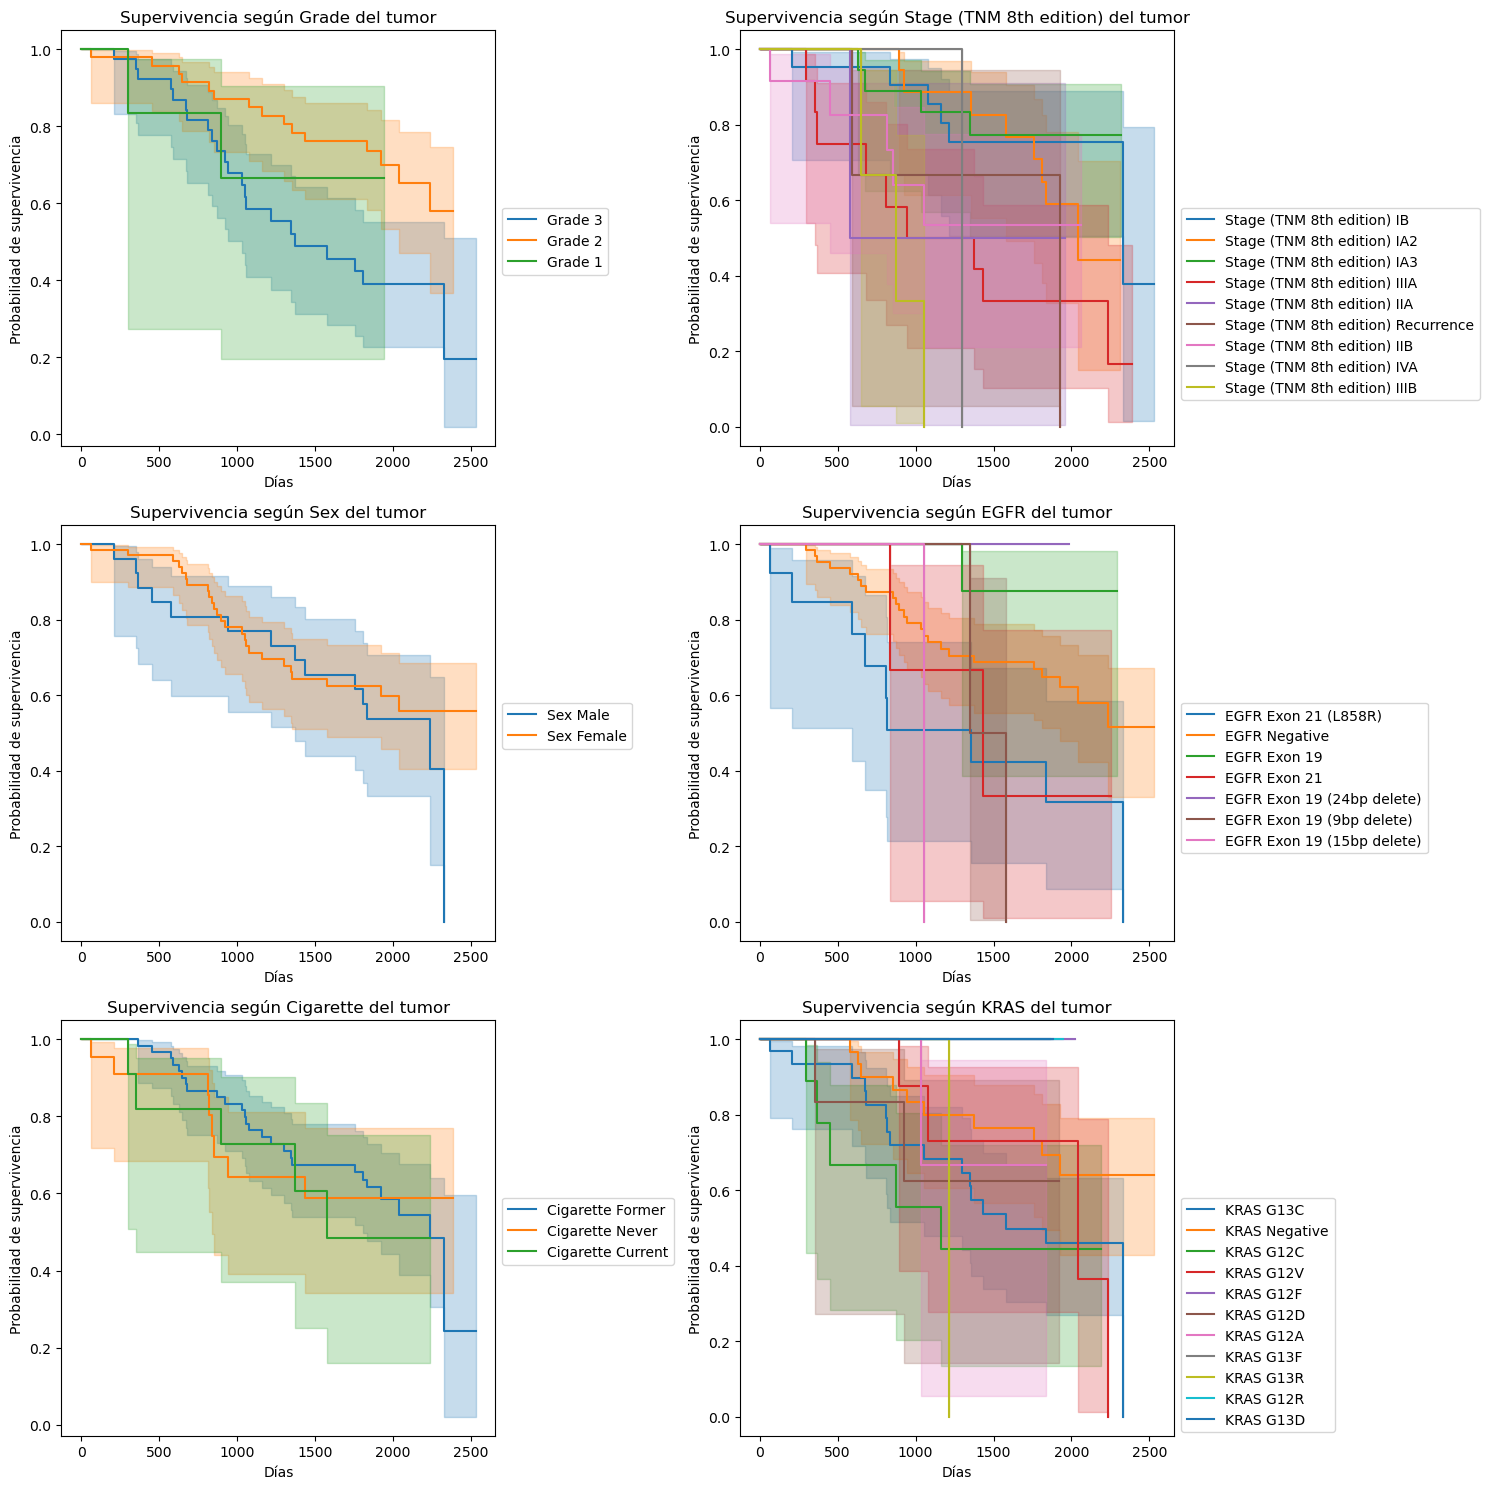

In [42]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
curva_supervivencia('Grade', ax=axs[0,0])
curva_supervivencia('Stage (TNM 8th edition)', ax=axs[0,1])
curva_supervivencia('Sex', ax=axs[1,0])
curva_supervivencia('EGFR', ax=axs[1,1])
curva_supervivencia('Cigarette', ax=axs[2,0])
curva_supervivencia('KRAS', ax=axs[2,1])
plt.tight_layout()
plt.show()

# Análisis de Cox Proportional Hazards

In [43]:
from lifelines import CoxPHFitter

In [44]:
clinic_encoded = pd.get_dummies(clinic_d, columns=['Stage (TNM 8th edition)', 'EGFR', 'KRAS', 'Sex', 'Cigarette'], drop_first=True)
df_cox = clinic_encoded.copy()
df_cox['T'] = T
df_cox['E'] = E
df_cox = df_cox.drop(['Patient ID', 'Survival time (days)', 'Event (death: 1, alive: 0)'], axis=1)

cph = CoxPHFitter()
cph.fit(df_cox, duration_col='T', event_col='E')
cph.print_summary()  # muestra coeficientes, hazard ratios, p-values



c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\lifelines\utils\__init__.py:1120: ConvergenceWarning: Column EGFR_Exon 19 (24bp delete) have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['E'].astype(bool)
>>> print(df.loc[events, 'EGFR_Exon 19 (24bp delete)'].var())
>>> print(df.loc[~events, 'EGFR_Exon 19 (24bp delete)'].var())

A very low variance means that the column EGFR_Exon 19 (24bp delete) completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\lifelines\utils\__init__.py:1163: ConvergenceWarning: Column EGFR_Exon 19 (24bp delete) has high sample correlation with the duration column. This may harm co

<lifelines.CoxPHFitter: fitted with 95 total observations, 56 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 95
number of events observed = 39
   partial log-likelihood = -128.45
         time fit was run = 2025-09-01 18:07:01 UTC

---
                                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                            
Tumor size (cm)                      0.34      1.40      0.19           -0.03            0.70                0.97                2.01
Grade                                0.88      2.42      0.42            0.06            1.70                1.07                5.49
Age                                  0.03      1.03      0.03           -0.02            0.09                0.98                1.09
Pack per year                       -0.01      0.99      0.02           -0.04            0.02                0.96                1.02
batch                                0.95      2.60      0.36            0.25            1.66                1.28                5.26
Stage (TNM 8th edition)_IA3         -0.55      0.58      0.68           -1.89            0.79                0.15                2.20
Stage (TNM 8th edition)_IB          -0.49      0.62      0.77           -1.99            1.02                0.14                2.77
Stage (TNM 8th edition)_IIA          2.02      7.57      1.29           -0.50            4.55                0.61               94.57
Stage (TNM 8th edition)_IIB         -0.16      0.86      0.93           -1.99            1.67                0.14                5.33
Stage (TNM 8th edition)_IIIA         0.17      1.18      0.84           -1.47            1.81                0.23                6.13
Stage (TNM 8th edition)_IIIB         3.74     42.10      1.57            0.66            6.82                1.94              913.99
Stage (TNM 8th edition)_IVA         21.87  3.14e+09   3979.51        -7777.83         7821.57                0.00                 inf
Stage (TNM 8th edition)_Recurrence   2.91     18.41      1.11            0.74            5.08                2.10              161.28
EGFR_Exon 19 (15bp delete)          16.21  1.10e+07   3979.51        -7783.49         7815.91                0.00                 inf
EGFR_Exon 19 (24bp delete)           0.83      2.30  16298.69       -31944.02        31945.68                0.00                 inf
EGFR_Exon 19 (9bp delete)           19.85  4.17e+08   3979.51        -7779.85         7819.55                0.00                 inf
EGFR_Exon 21                        19.64  3.39e+08   3979.51        -7780.06         7819.34                0.00                 inf
EGFR_Exon 21 (L858R)                20.15  5.64e+08   3979.51        -7779.55         7819.85                0.00                 inf
EGFR_Negative                       20.32  6.69e+08   3979.51        -7779.38         7820.02                0.00                 inf
KRAS_G12C                            0.82      2.26      1.25           -1.63            3.26                0.20               26.06
KRAS_G12D                            0.44      1.55      1.31           -2.13            3.00                0.12               20.09
KRAS_G12F                          -18.63      0.00  12412.65       -24346.97        24309.71                0.00                 inf
KRAS_G12R                          -18.25      0.00  15805.40       -30996.27        30959.78                0.00                 inf
KRAS_G12V                           -0.57      0.57      1.24           -3.01            1.87                0.05                6.49
KRAS_G13C                            0.77      2.16      1.43           -2.03            3.57                0.13               35.49
KRAS_G13D                          -

In [45]:
df_cox.head()

,Tumor size (cm),Grade,Age,Pack per year,batch,Stage (TNM 8th edition)_IA3,Stage (TNM 8th edition)_IB,Stage (TNM 8th edition)_IIA,Stage (TNM 8th edition)_IIB,Stage (TNM 8th edition)_IIIA,...,KRAS_G13C,KRAS_G13D,KRAS_G13F,KRAS_G13R,KRAS_Negative,Sex_Male,Cigarette_Former,Cigarette_Never,T,E
0,2.6,3,67,50.0,1,False,True,False,False,False,...,True,False,False,False,False,True,True,False,2329,1
1,3.5,3,68,52.5,1,False,True,False,False,False,...,False,False,False,False,True,False,True,False,2532,0
2,2.0,2,80,0.0,1,False,False,False,False,False,...,False,False,False,False,True,False,False,True,2271,0
3,3.0,2,63,47.0,1,True,False,False,False,False,...,False,False,False,False,False,True,True,False,2193,0
4,4.0,2,88,0.0,1,False,False,False,False,True,...,False,False,False,False,True,False,False,True,2387,0


In [46]:
clinic.columns

Index(['Patient ID', 'Survival time (days)', 'Event (death: 1, alive: 0)',
       'Tumor size (cm)', 'Grade', 'Stage (TNM 8th edition)', 'Age', 'Sex',
       'Cigarette', 'Pack per year', 'Type.Adjuvant', 'batch', 'EGFR', 'KRAS'],
      dtype='object')

# Construccion del modelo Arbol de decisión

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [48]:
clinic_d.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,batch,EGFR,KRAS
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,1,Exon 21 (L858R),G13C
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,1,Negative,Negative
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,1,Negative,Negative
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,1,Negative,G12C
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,1,Negative,Negative


In [49]:
clinic_d.columns

Index(['Patient ID', 'Survival time (days)', 'Event (death: 1, alive: 0)',
       'Tumor size (cm)', 'Grade', 'Stage (TNM 8th edition)', 'Age', 'Sex',
       'Cigarette', 'Pack per year', 'batch', 'EGFR', 'KRAS'],
      dtype='object')

In [50]:
columnas_f = clinic_d.columns
predictores = columnas_f[3:]
objetivo = columnas_f[2]

In [51]:
from sklearn.preprocessing import OrdinalEncoder

# Seleccionamos las columnas categóricas automáticamente
categorical_cols = clinic_d.select_dtypes(include=['object']).columns

# Crear el encoder
encoder = OrdinalEncoder()

# Aplicar encoder
clinic_encoded = clinic_d.copy()
clinic_encoded[categorical_cols] = encoder.fit_transform(clinic_d[categorical_cols])

clinic_encoded.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,batch,EGFR,KRAS
0,0.0,2329,1,2.6,3,2.0,67,1.0,1.0,50.0,1,5.0,6.0
1,1.0,2532,0,3.5,3,2.0,68,0.0,1.0,52.5,1,6.0,10.0
2,2.0,2271,0,2.0,2,0.0,80,0.0,2.0,0.0,1,6.0,10.0
3,3.0,2193,0,3.0,2,1.0,63,1.0,1.0,47.0,1,6.0,1.0
4,4.0,2387,0,4.0,2,5.0,88,0.0,2.0,0.0,1,6.0,10.0


In [52]:
x_train, x_test, y_train, y_test = train_test_split(
    clinic_encoded[predictores], clinic_encoded[objetivo], test_size=0.3, random_state=42)

In [53]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, random_state=0)
tree.fit(x_train,y_train)
pred = tree.predict(x_test)
pd.crosstab(y_test, pred, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,12,3
1,7,7


In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [55]:
# Evaluaciones
print("Accuracy:", accuracy_score(y_test, pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, pred))
print("Reporte de clasificación:\n", classification_report(y_test, pred))

# Calculo de AUC
y_prob = tree.predict_proba(x_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.6551724137931034
Matriz de confusión:
 [[12  3]
 [ 7  7]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.70      0.50      0.58        14

    accuracy                           0.66        29
   macro avg       0.67      0.65      0.64        29
weighted avg       0.66      0.66      0.65        29

AUC: 0.6714285714285714


# Analisis de variantes

In [56]:
variantes_kras = pd.read_csv(r'Datos_clinicos\variantes_alpha_missens_kras.csv')

In [57]:
variantes_kras.head()

,protein_variant,am_pathogenicity,am_class
0,M1A,0.8343,LPath
1,M1C,0.6250,LPath
2,M1D,0.9878,LPath
3,M1E,0.9461,LPath
4,M1F,0.5419,Amb


In [58]:
variantes_kras.rename(columns={"protein_variant": "KRAS", 'am_pathogenicity': 'patogenicidad_variante_KRAS', 'am_class':'efecto_mutacion_KRAS'}, inplace=True)

In [59]:
variantes_kras.head()

,KRAS,patogenicidad_variante_KRAS,efecto_mutacion_KRAS
0,M1A,0.8343,LPath
1,M1C,0.6250,LPath
2,M1D,0.9878,LPath
3,M1E,0.9461,LPath
4,M1F,0.5419,Amb


In [60]:
variantes_kras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591 entries, 0 to 3590
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   KRAS                         3591 non-null   object 
 1   patogenicidad_variante_KRAS  3591 non-null   float64
 2   efecto_mutacion_KRAS         3591 non-null   object 
dtypes: float64(1), object(2)
memory usage: 84.3+ KB


In [61]:
clinic_encoded.shape

(95, 13)

In [62]:
clinic_variand = pd.merge(clinic_d, variantes_kras, on='KRAS', how='left')
clinic_variand.shape

(95, 15)

In [63]:
clinic_variand.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,batch,EGFR,KRAS,patogenicidad_variante_KRAS,efecto_mutacion_KRAS
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,1,Exon 21 (L858R),G13C,0.9889,LPath
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,1,Negative,Negative,NaN,NaN
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,1,Negative,Negative,NaN,NaN
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,1,Negative,G12C,0.9975,LPath
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,1,Negative,Negative,NaN,NaN


In [64]:
variantes_kras['efecto_mutacion_KRAS'].unique()

array(['LPath', 'Amb', 'LBen'], dtype=object)

In [65]:
variantes_kras[variantes_kras['efecto_mutacion_KRAS'] == 'LPath'].min()

KRAS                            A11C
patogenicidad_variante_KRAS    0.564
efecto_mutacion_KRAS           LPath
dtype: object

In [66]:
variantes_kras[variantes_kras['efecto_mutacion_KRAS'] == 'Amb'].max()

KRAS                            Y166W
patogenicidad_variante_KRAS    0.5632
efecto_mutacion_KRAS              Amb
dtype: object

In [67]:
variantes_kras[variantes_kras['efecto_mutacion_KRAS'] == 'Amb'].min()

KRAS                            A11G
patogenicidad_variante_KRAS    0.341
efecto_mutacion_KRAS             Amb
dtype: object

In [68]:
variantes_kras[variantes_kras['efecto_mutacion_KRAS'] == 'LBen'].max()

KRAS                             Y96F
patogenicidad_variante_KRAS    0.3397
efecto_mutacion_KRAS             LBen
dtype: object

In [69]:
clinic_variand['patogenicidad_variante_KRAS'] = clinic_variand['patogenicidad_variante_KRAS'].fillna(0.5)
clinic_variand['efecto_mutacion_KRAS'] = clinic_variand['efecto_mutacion_KRAS'].fillna('neutro')
clinic_variand.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,batch,EGFR,KRAS,patogenicidad_variante_KRAS,efecto_mutacion_KRAS
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,1,Exon 21 (L858R),G13C,0.9889,LPath
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,1,Negative,Negative,0.5000,neutro
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,1,Negative,Negative,0.5000,neutro
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,1,Negative,G12C,0.9975,LPath
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,1,Negative,Negative,0.5000,neutro


In [70]:
clinic_variand.groupby('efecto_mutacion_KRAS')['efecto_mutacion_KRAS'].count()

efecto_mutacion_KRAS
LPath     63
neutro    32
Name: efecto_mutacion_KRAS, dtype: int64

In [71]:
clinic_variand.groupby('patogenicidad_variante_KRAS')['patogenicidad_variante_KRAS'].count()

patogenicidad_variante_KRAS
0.5000    32
0.9575     3
0.9889    31
0.9949     8
0.9960     1
0.9972     1
0.9975     9
0.9977     1
0.9980     1
0.9984     6
0.9987     2
Name: patogenicidad_variante_KRAS, dtype: int64

### Nota
Los valores nulos de patogenicidad_variante_KRAS se sustituyeron con 0.5 debido a que estos valores nulos corresponden a la proteína WT, sin mutaciones, donde 0.5 corresponde a un efecto nulo. Todas las mutaciones de KRAS fueron identificadas como patogenicas segun Alpha missense, con una puntuacion superior al 0.9575

In [72]:
clinic['EGFR'].unique()

array([nan, 'Negative', 'Exon 19', 'Exon 21', 'Exon 21 (L858R)',
       'Exon 19 (24bp delete)', 'Exon 19 (9bp delete)',
       'Exon 19 (15bp delete)'], dtype=object)

In [73]:
import requests

# === Ejemplo de dataset ===
data = {
    "Mutation": ['Exon 19', 'Exon 21', 'Exon 21 (L858R)',
       'Exon 19 (24bp delete)', 'Exon 19 (9bp delete)',
       'Exon 19 (15bp delete)']
}
df = pd.DataFrame(data)

# === Función para normalizar mutación ===
def parse_mutation(mutation):
    mutation = mutation.strip()
    if "delete" in mutation.lower():
        return {"Type": "Deletion", "Detail": mutation}
    elif "(" in mutation and ")" in mutation:
        aa_change = mutation.split("(")[1].replace(")", "")
        if any(char.isdigit() for char in aa_change):
            return {"Type": "Missense/In-frame", "Detail": aa_change}
    return {"Type": "Other", "Detail": mutation}

# === Ejemplo consulta a OncoKB API ===
def query_oncokb(aa_change, gene="EGFR"):
    url = f"https://www.oncokb.org/api/v1/mutations/byProteinChange?hugoSymbol={gene}&alteration={aa_change}"
    headers = {"Authorization": "En proceso de aprovación de la API"}  # Necesitas clave gratuita en OncoKB
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        if data:
            return {
                "Gene": data[0].get("hugoSymbol", gene),
                "MutationEffect": data[0].get("mutationEffect", {}).get("description", "N/A"),
                "Drugs": [drug["drugName"] for drug in data[0].get("drugs", [])]
            }
    return {"Gene": gene, "MutationEffect": "Unknown", "Drugs": []}

# === Procesamiento ===
annotations = []
for mut in df["Mutation"]:
    parsed = parse_mutation(mut)
    effect = {}
    if parsed["Type"] == "Missense/In-frame":
        effect = query_oncokb(parsed["Detail"])
    annotations.append({**parsed, **effect})

df_annotations = pd.concat([df, pd.DataFrame(annotations)], axis=1)

print(df_annotations)

                Mutation               Type                 Detail  Gene  \
0                Exon 19              Other                Exon 19   NaN   
1                Exon 21              Other                Exon 21   NaN   
2        Exon 21 (L858R)  Missense/In-frame                  L858R  EGFR   
3  Exon 19 (24bp delete)           Deletion  Exon 19 (24bp delete)   NaN   
4   Exon 19 (9bp delete)           Deletion   Exon 19 (9bp delete)   NaN   
5  Exon 19 (15bp delete)           Deletion  Exon 19 (15bp delete)   NaN   

  MutationEffect Drugs  
0            NaN   NaN  
1            NaN   NaN  
2        Unknown    []  
3            NaN   NaN  
4            NaN   NaN  
5            NaN   NaN  


In [74]:
clinic_variand.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,batch,EGFR,KRAS,patogenicidad_variante_KRAS,efecto_mutacion_KRAS
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,1,Exon 21 (L858R),G13C,0.9889,LPath
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,1,Negative,Negative,0.5000,neutro
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,1,Negative,Negative,0.5000,neutro
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,1,Negative,G12C,0.9975,LPath
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,1,Negative,Negative,0.5000,neutro


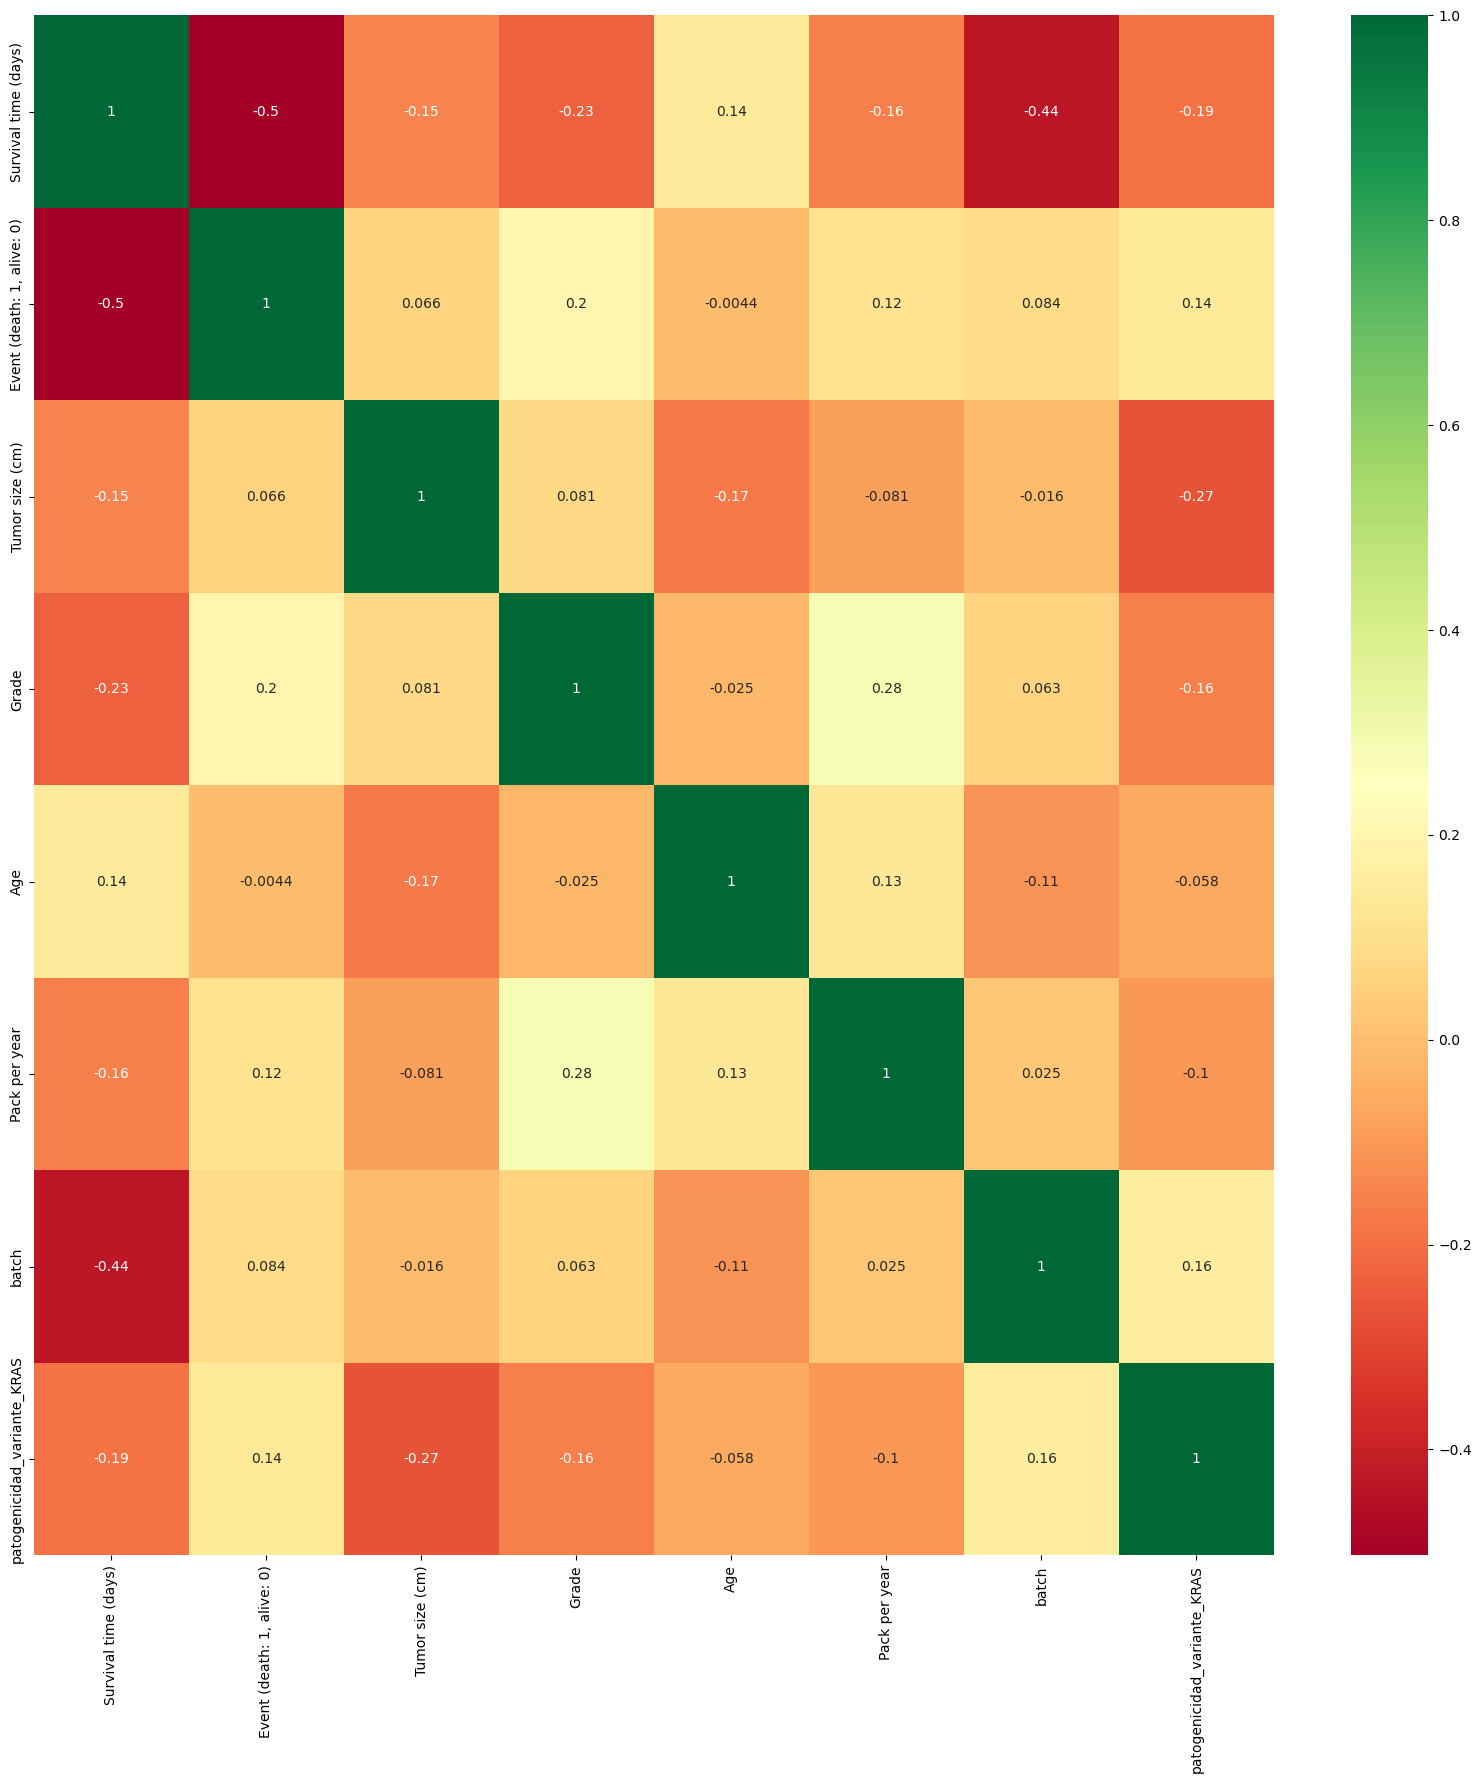

In [75]:
numeric_cols = clinic_variand.select_dtypes(include=['number'])
columnas = numeric_cols.columns

correlation_matrix_m = clinic_variand[columnas].corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation_matrix_m, cmap= 'RdYlGn', annot =True)
plt.show()

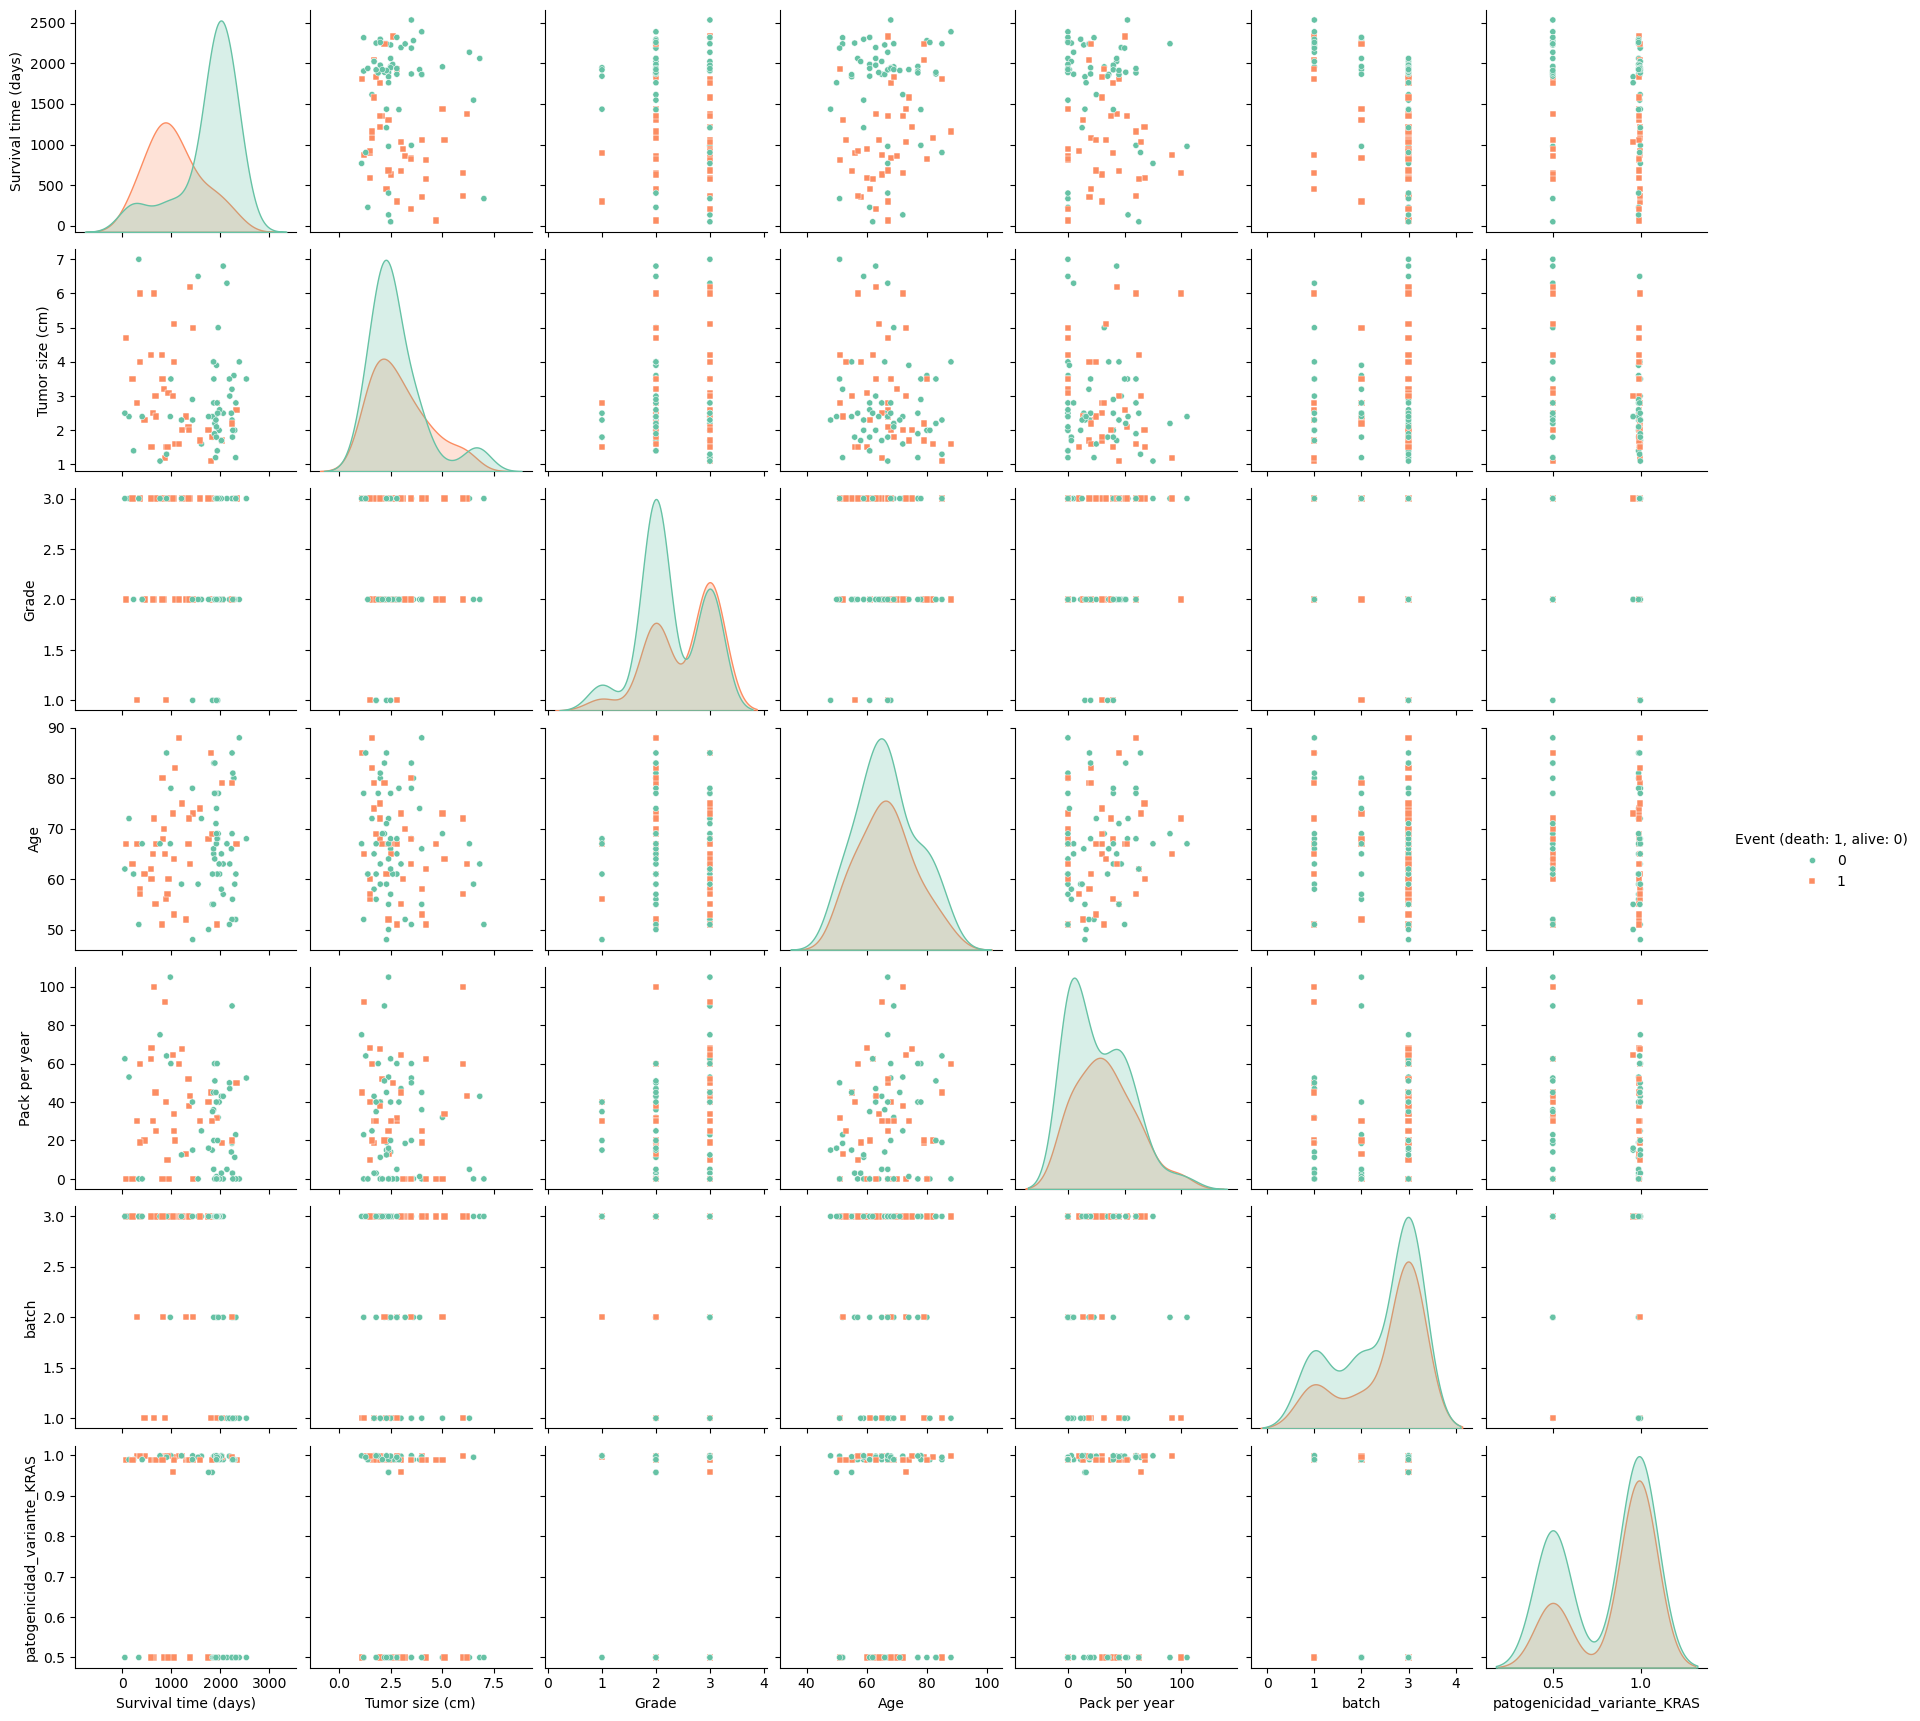

In [76]:
sns.pairplot(clinic_variand, hue='Event (death: 1, alive: 0)', markers=["o", "s"],  plot_kws={"s": 20}, palette="Set2")

In [77]:
clinic_variand.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,batch,EGFR,KRAS,patogenicidad_variante_KRAS,efecto_mutacion_KRAS
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,1,Exon 21 (L858R),G13C,0.9889,LPath
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,1,Negative,Negative,0.5000,neutro
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,1,Negative,Negative,0.5000,neutro
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,1,Negative,G12C,0.9975,LPath
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,1,Negative,Negative,0.5000,neutro


In [78]:
clinic_variand.columns

Index(['Patient ID', 'Survival time (days)', 'Event (death: 1, alive: 0)',
       'Tumor size (cm)', 'Grade', 'Stage (TNM 8th edition)', 'Age', 'Sex',
       'Cigarette', 'Pack per year', 'batch', 'EGFR', 'KRAS',
       'patogenicidad_variante_KRAS', 'efecto_mutacion_KRAS'],
      dtype='object')

In [79]:
X_v = clinic_variand[['Tumor size (cm)', 'Grade', 'Stage (TNM 8th edition)','Sex', 
         'Pack per year','EGFR', 'efecto_mutacion_KRAS']]
y_v = clinic_variand['Event (death: 1, alive: 0)']

In [80]:
# Seleccionamos las columnas categóricas automáticamente
categorical_cols = X_v.select_dtypes(include=['object']).columns

# Crear el encoder
encoder = OrdinalEncoder()

# Aplicar encoder
clinic_encoded = X_v.copy()
clinic_encoded[categorical_cols] = encoder.fit_transform(X_v[categorical_cols])
clinic_encoded.head()
x_train_v, x_test_v, y_train_v, y_test_v = train_test_split(
    clinic_encoded, y_v, test_size=0.3, random_state=10)


In [81]:
tree_v = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, random_state=0)
tree_v.fit(x_train_v,y_train_v)
pred_v = tree_v.predict(x_test_v)
pd.crosstab(y_test_v, pred_v, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,16,4
1,7,2


In [82]:
# Evaluaciones
print("Accuracy:", accuracy_score(y_test_v, pred_v))
print("Matriz de confusión:\n", confusion_matrix(y_test_v, pred_v))
print("Reporte de clasificación:\n", classification_report(y_test_v, pred_v))

# Calculo de AUC
y_prob_v = tree_v.predict_proba(x_test_v)[:, 1]
print("AUC:", roc_auc_score(y_test_v, y_prob_v))

Accuracy: 0.6206896551724138
Matriz de confusión:
 [[16  4]
 [ 7  2]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.70      0.80      0.74        20
           1       0.33      0.22      0.27         9

    accuracy                           0.62        29
   macro avg       0.51      0.51      0.51        29
weighted avg       0.58      0.62      0.60        29

AUC: 0.5722222222222222


# Construccion de modelo de Bosques aleatorios

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=5000)
forest.fit(x_train_v,y_train_v)

RandomForestClassifier(n_estimators=5000, n_jobs=2, oob_score=True)

In [85]:
forest.oob_score_

0.5757575757575758

In [86]:
predictions = forest.predict(x_test_v)

In [87]:
predictions

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0])

In [88]:
pd.crosstab(y_test_v, predictions, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,17,3
1,4,5


In [89]:
# Evaluaciones
print("Accuracy:", accuracy_score(y_test_v, predictions))
print("Matriz de confusión:\n", confusion_matrix(y_test_v, predictions))
print("Reporte de clasificación:\n", classification_report(y_test_v, predictions))

# Calculo de AUC
y_prob_f = forest.predict_proba(x_test_v)[:, 1]
print("AUC:", roc_auc_score(y_test_v, y_prob_f))

Accuracy: 0.7586206896551724
Matriz de confusión:
 [[17  3]
 [ 4  5]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.62      0.56      0.59         9

    accuracy                           0.76        29
   macro avg       0.72      0.70      0.71        29
weighted avg       0.75      0.76      0.75        29

AUC: 0.7444444444444445


## Optimización del modelo

### Cambio de peso a la clase minoritaria

In [90]:
forest_2 = RandomForestClassifier(n_jobs=2, oob_score=True, class_weight={0:1, 1:1.5}, n_estimators=5000)
forest_2.fit(x_train_v,y_train_v)
forest_2.oob_score_

0.5757575757575758

In [91]:
predictions_2 = forest_2.predict(x_test_v)
pd.crosstab(y_test_v, predictions_2, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,18,2
1,5,4


In [92]:
# Evaluaciones
print("Accuracy:", accuracy_score(y_test_v, predictions_2))
print("Matriz de confusión:\n", confusion_matrix(y_test_v, predictions_2))
print("Reporte de clasificación:\n", classification_report(y_test_v, predictions_2))

# Calculo de AUC
y_prob_f2 = forest.predict_proba(x_test_v)[:, 1]
print("AUC:", roc_auc_score(y_test_v, y_prob_f2))

Accuracy: 0.7586206896551724
Matriz de confusión:
 [[18  2]
 [ 5  4]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.67      0.44      0.53         9

    accuracy                           0.76        29
   macro avg       0.72      0.67      0.69        29
weighted avg       0.75      0.76      0.74        29

AUC: 0.7444444444444445


### Generación de datos sinteticos: Balance de la clase minoritaria

In [93]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state=99)
X_res, y_res = smote.fit_resample(x_train_v, y_train_v)

In [94]:
forest3 = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=5000)
forest3.fit(X_res, y_res)
forest3.oob_score_

0.625

In [95]:
predictions3 = forest3.predict(x_test_v)
pd.crosstab(y_test_v, predictions3, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,17,3
1,4,5


In [96]:
# Evaluaciones
print("Accuracy:", accuracy_score(y_test_v, predictions3))
print("Matriz de confusión:\n", confusion_matrix(y_test_v, predictions3))
print("Reporte de clasificación:\n", classification_report(y_test_v, predictions3))

# Calculo de AUC
y_prob_f3 = forest.predict_proba(x_test_v)[:, 1]
print("AUC:", roc_auc_score(y_test_v, y_prob_f3))

Accuracy: 0.7586206896551724
Matriz de confusión:
 [[17  3]
 [ 4  5]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.62      0.56      0.59         9

    accuracy                           0.76        29
   macro avg       0.72      0.70      0.71        29
weighted avg       0.75      0.76      0.75        29

AUC: 0.7444444444444445


### Segundo modelo de bosques aleatorios

In [97]:
clinic['Type.Adjuvant']

0      None
1      None
2      None
3      None
4      None
      ...  
90     None
91     None
92    Chemo
93     None
94     None
Name: Type.Adjuvant, Length: 95, dtype: object

In [98]:
clinic_forest = clinic_d
clinic_forest['Adjuvante'] = clinic['Type.Adjuvant']
clinic_forest.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,batch,EGFR,KRAS,Adjuvante
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,1,Exon 21 (L858R),G13C,None
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,1,Negative,Negative,None
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,1,Negative,Negative,None
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,1,Negative,G12C,None
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,1,Negative,Negative,None


In [130]:
X_v2 = clinic_forest[['Tumor size (cm)', 'Grade', 'Stage (TNM 8th edition)', 'Sex',
        'Pack per year', 'EGFR', 'KRAS', 'Adjuvante']]
y_v2 = clinic_variand['Event (death: 1, alive: 0)']
# Seleccionamos las columnas categóricas automáticamente
categorical_cols = X_v2.select_dtypes(include=['object']).columns

# Crear el encoder
encoder = OrdinalEncoder()

# Aplicar encoder
clinic_encoded2 = X_v2.copy()
clinic_encoded2[categorical_cols] = encoder.fit_transform(X_v2[categorical_cols])

x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(
    clinic_encoded2, y_v2, test_size=0.3, random_state=10)



In [131]:
forest4 = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=5000)
forest4.fit(x_train_f,y_train_f)
forest4.oob_score_

0.5454545454545454

In [144]:
predictions4 = forest4.predict(x_test_f)
pd.crosstab(y_test_f, predictions4, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,18,2
1,4,5


In [145]:
# Evaluaciones
print("Accuracy:", accuracy_score(y_test_f, predictions4))
print("Matriz de confusión:\n", confusion_matrix(y_test_f, predictions4))
print("Reporte de clasificación:\n", classification_report(y_test_f, predictions4))

# Calculo de AUC
y_prob_f4 = forest4.predict_proba(x_test_f)[:, 1]
print("AUC:", roc_auc_score(y_test_f, y_prob_f4))

Accuracy: 0.7931034482758621
Matriz de confusión:
 [[18  2]
 [ 4  5]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.71      0.56      0.62         9

    accuracy                           0.79        29
   macro avg       0.77      0.73      0.74        29
weighted avg       0.79      0.79      0.79        29

AUC: 0.8


### Bosques Aleatorios con validación cruzada - con Adjuvante

In [125]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_val_predict

In [134]:
forest_bavc = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=5000)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar con cross_val_score
scores = cross_val_score(forest_bavc, clinic_encoded2, y_v2, cv=cv, scoring='accuracy')
scores.mean()

np.float64(0.6736842105263158)

In [135]:
y_pred_bavc = cross_val_predict(forest_bavc, clinic_encoded2, y_v2, cv=cv, method='predict')
y_proba_bavc = cross_val_predict(forest_bavc, clinic_encoded2, y_v2, cv=cv, method='predict_proba')[:,1]
# Evaluaciones
print("Accuracy:", accuracy_score(y_v2, y_pred_bavc))
print("Matriz de confusión:\n", confusion_matrix(y_v2, y_pred_bavc))
print("Reporte de clasificación:\n", classification_report(y_v2, y_pred_bavc))

# Calculo de AUC

print("AUC:", roc_auc_score(y_v2, y_proba_bavc))

Accuracy: 0.6526315789473685
Matriz de confusión:
 [[43 13]
 [20 19]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72        56
           1       0.59      0.49      0.54        39

    accuracy                           0.65        95
   macro avg       0.64      0.63      0.63        95
weighted avg       0.65      0.65      0.65        95

AUC: 0.6856684981684982


In [136]:
X_v3 = clinic_forest[['Tumor size (cm)', 'Grade', 'Stage (TNM 8th edition)', 'Sex',
        'Pack per year', 'EGFR', 'KRAS']]

categorical_cols2 = X_v3.select_dtypes(include=['object']).columns
# Aplicar encoder
clinic_encoded3 = X_v3.copy()
clinic_encoded3[categorical_cols2] = encoder.fit_transform(X_v3[categorical_cols2])

forest_bavc2 = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=5000)

# Evaluar con cross_val_score
scores = cross_val_score(forest_bavc2, clinic_encoded3, y_v2, cv=cv, scoring='accuracy')
scores.mean()

np.float64(0.6631578947368422)

In [137]:
y_pred_bavc2 = cross_val_predict(forest_bavc2, clinic_encoded3, y_v2, cv=cv, method='predict')
y_proba_bavc2 = cross_val_predict(forest_bavc2, clinic_encoded3, y_v2, cv=cv, method='predict_proba')[:,1]
# Evaluaciones
print("Accuracy:", accuracy_score(y_v2, y_pred_bavc2))
print("Matriz de confusión:\n", confusion_matrix(y_v2, y_pred_bavc2))
print("Reporte de clasificación:\n", classification_report(y_v2, y_pred_bavc2))

# Calculo de AUC

print("AUC:", roc_auc_score(y_v2, y_proba_bavc2))

Accuracy: 0.6736842105263158
Matriz de confusión:
 [[44 12]
 [19 20]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74        56
           1       0.62      0.51      0.56        39

    accuracy                           0.67        95
   macro avg       0.66      0.65      0.65        95
weighted avg       0.67      0.67      0.67        95

AUC: 0.7042124542124543


### Bosques Aleatorios con validación cruzada - sin Adjuvante

## Construccion del modelo con Knn

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [105]:
clinic_d.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,batch,EGFR,KRAS,Adjuvante
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,1,Exon 21 (L858R),G13C,None
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,1,Negative,Negative,None
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,1,Negative,Negative,None
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,1,Negative,G12C,None
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,1,Negative,Negative,None


In [108]:
columnas_d = clinic_d.columns[3:]
categorical_knn = clinic_d[columnas_d].select_dtypes(include=['object']).columns
data_knn = clinic_d

In [109]:
categorias = ['Stage (TNM 8th edition)', 'Sex', 'Cigarette', 'EGFR', 'KRAS']
# Obtencion de variable dummies
for categoria in categorias:
    dummies = pd.get_dummies(
        data_knn[categoria],
        prefix=categoria,
        drop_first=True,
        dtype=int  # <--- aquí fuerzas que sean 0/1 numéricos
    )
    data_knn = pd.concat([data_knn, dummies], axis=1)
data_knn.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,...,KRAS_G12C,KRAS_G12D,KRAS_G12F,KRAS_G12R,KRAS_G12V,KRAS_G13C,KRAS_G13D,KRAS_G13F,KRAS_G13R,KRAS_Negative
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,...,0,0,0,0,0,1,0,0,0,0
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,...,0,0,0,0,0,0,0,0,0,1
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,...,0,0,0,0,0,0,0,0,0,1
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,...,1,0,0,0,0,0,0,0,0,0
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,...,0,0,0,0,0,0,0,0,0,1


In [110]:
data_knn.drop(categorias, axis=1, inplace=True)
data_knn.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Age,Pack per year,batch,Adjuvante,Stage (TNM 8th edition)_IA3,...,KRAS_G12C,KRAS_G12D,KRAS_G12F,KRAS_G12R,KRAS_G12V,KRAS_G13C,KRAS_G13D,KRAS_G13F,KRAS_G13R,KRAS_Negative
0,P109342,2329,1,2.6,3,67,50.0,1,None,0,...,0,0,0,0,0,1,0,0,0,0
1,P124450,2532,0,3.5,3,68,52.5,1,None,0,...,0,0,0,0,0,0,0,0,0,1
2,P131833,2271,0,2.0,2,80,0.0,1,None,0,...,0,0,0,0,0,0,0,0,0,1
3,P131888,2193,0,3.0,2,63,47.0,1,None,1,...,1,0,0,0,0,0,0,0,0,0
4,P131946,2387,0,4.0,2,88,0.0,1,None,0,...,0,0,0,0,0,0,0,0,0,1


In [111]:
data_knn.columns

Index(['Patient ID', 'Survival time (days)', 'Event (death: 1, alive: 0)',
       'Tumor size (cm)', 'Grade', 'Age', 'Pack per year', 'batch',
       'Adjuvante', 'Stage (TNM 8th edition)_IA3',
       'Stage (TNM 8th edition)_IB', 'Stage (TNM 8th edition)_IIA',
       'Stage (TNM 8th edition)_IIB', 'Stage (TNM 8th edition)_IIIA',
       'Stage (TNM 8th edition)_IIIB', 'Stage (TNM 8th edition)_IVA',
       'Stage (TNM 8th edition)_Recurrence', 'Sex_Male', 'Cigarette_Former',
       'Cigarette_Never', 'EGFR_Exon 19 (15bp delete)',
       'EGFR_Exon 19 (24bp delete)', 'EGFR_Exon 19 (9bp delete)',
       'EGFR_Exon 21', 'EGFR_Exon 21 (L858R)', 'EGFR_Negative', 'KRAS_G12C',
       'KRAS_G12D', 'KRAS_G12F', 'KRAS_G12R', 'KRAS_G12V', 'KRAS_G13C',
       'KRAS_G13D', 'KRAS_G13F', 'KRAS_G13R', 'KRAS_Negative'],
      dtype='object')

In [114]:
data_knn.drop('Adjuvante', axis=1, inplace=True)
data_knn.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Age,Pack per year,batch,Stage (TNM 8th edition)_IA3,Stage (TNM 8th edition)_IB,...,KRAS_G12C,KRAS_G12D,KRAS_G12F,KRAS_G12R,KRAS_G12V,KRAS_G13C,KRAS_G13D,KRAS_G13F,KRAS_G13R,KRAS_Negative
0,P109342,2329,1,2.6,3,67,50.0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,P124450,2532,0,3.5,3,68,52.5,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,P131833,2271,0,2.0,2,80,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,P131888,2193,0,3.0,2,63,47.0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,P131946,2387,0,4.0,2,88,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### Selección de caracteristicas

In [112]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [115]:
columnas_select = data_knn.columns[3:]
respuesta = data_knn.columns[2]
X_knn = data_knn[columnas_select]
y_knn = data_knn[respuesta]

best_score = 0
best_n_features = 0

# Probar desde 1 hasta el total de predictores
for n in range(1, X_knn.shape[1]+1):
    estimator = SVR(kernel="linear")
    selector = RFE(estimator, n_features_to_select=n, step=1)
    X_selected = selector.fit_transform(X_knn, y_knn)
    
    # Evaluar con validación cruzada
    score = cross_val_score(estimator, X_selected, y_knn, cv=3).mean()
    
    if score > best_score:
        best_score = score
        best_n_features = n

print(f"Mejor número de características: {best_n_features}, Score: {best_score:.4f}")

Mejor número de características: 9, Score: 0.1119


In [116]:
X_knn = data_knn[columnas_select]
y_knn = data_knn[respuesta]
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=9, step=1)
selector = selector.fit(X_knn, y_knn)
selector.support_

rfe_results = pd.DataFrame({
    "Predictor": X_knn.columns,
    "Selected": selector.support_
})
rfe_results

,Predictor,Selected
0,Tumor size (cm),False
1,Grade,True
2,Age,False
3,Pack per year,False
4,batch,False
5,Stage (TNM 8th edition)_IA3,True
6,Stage (TNM 8th edition)_IB,False
7,Stage (TNM 8th edition)_IIA,False
8,Stage (TNM 8th edition)_IIB,False
9,Stage (TNM 8th edition)_IIIA,True


In [117]:
predictores_d = rfe_results[rfe_results['Selected'] == True]['Predictor'].unique()
predictores_d

array(['Grade', 'Stage (TNM 8th edition)_IA3',
       'Stage (TNM 8th edition)_IIIA', 'Stage (TNM 8th edition)_IIIB',
       'Stage (TNM 8th edition)_IVA', 'Sex_Male',
       'EGFR_Exon 19 (9bp delete)', 'EGFR_Exon 21 (L858R)', 'KRAS_G13R'],
      dtype=object)

In [119]:
data_knn[predictores_d].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Grade                         95 non-null     int64
 1   Stage (TNM 8th edition)_IA3   95 non-null     int64
 2   Stage (TNM 8th edition)_IIIA  95 non-null     int64
 3   Stage (TNM 8th edition)_IIIB  95 non-null     int64
 4   Stage (TNM 8th edition)_IVA   95 non-null     int64
 5   Sex_Male                      95 non-null     int64
 6   EGFR_Exon 19 (9bp delete)     95 non-null     int64
 7   EGFR_Exon 21 (L858R)          95 non-null     int64
 8   KRAS_G13R                     95 non-null     int64
dtypes: int64(9)
memory usage: 6.8 KB


In [ ]:
columnas

Index(['Survival time (days)', 'Event (death: 1, alive: 0)', 'Tumor size (cm)',
       'Grade', 'Age', 'Pack per year', 'batch',
       'patogenicidad_variante_KRAS'],
      dtype='object')

In [121]:
respuesta = columnas[1]

x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(
    data_knn[predictores_d], data_knn[respuesta], test_size=0.2, random_state=50)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train_knn)
x_test_scal = scaler.transform(x_test_knn)

In [122]:
k_values = range(1,15)
score_list = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_scaled, y_train_knn)
    score = knn_classifier.score(x_test_scal, y_test_knn)
    score_list.append(score)
print(score_list)

[0.5263157894736842, 0.631578947368421, 0.631578947368421, 0.47368421052631576, 0.5789473684210527, 0.5263157894736842, 0.42105263157894735, 0.5263157894736842, 0.47368421052631576, 0.47368421052631576, 0.5263157894736842, 0.5263157894736842, 0.5789473684210527, 0.47368421052631576]


In [124]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_scaled, y_train_knn)
y_pred = knn_classifier.predict(x_test_scal)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

# Reduccion de dimencionalidad

In [138]:
from sklearn.decomposition import PCA
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(
    data_knn[columnas_select], data_knn['Event (death: 1, alive: 0)'], test_size=0.3, random_state=10)
# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train_p)

# Optimizar número de componentes PCA
componentes = [5, 10, 15, 20, 25, 30]  # probar varios
pca_scores = []

for n in componentes:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    
    knn = KNeighborsClassifier(n_neighbors=5)  # valor temporal de n_neighbors
    score = cross_val_score(knn, X_pca, y_train_p, cv=5, scoring='accuracy').mean()
    pca_scores.append(score)

# Elegir el menor número de componentes con buen score
mejor_n_components = componentes[np.argmax(pca_scores)]
print("Mejor n_components:", mejor_n_components)

# Transformar con PCA óptimo
pca_final = PCA(n_components=mejor_n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

# Optimizar n_neighbors
vecinos = range(1, 21)
knn_scores = []

for k in vecinos:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_pca_final, y_train_p, cv=5, scoring='accuracy').mean()
    knn_scores.append(score)

mejor_n_neighbors = vecinos[np.argmax(knn_scores)]
print("Mejor n_neighbors:", mejor_n_neighbors)
print("Mejor accuracy:", max(knn_scores))

Mejor n_components: 5
Mejor n_neighbors: 11
Mejor accuracy: 0.5791208791208791


[1.11582709e-01 9.26222542e-02 6.43885938e-02 6.27586389e-02
 6.01840167e-02 5.54968710e-02 5.17571032e-02 4.59185480e-02
 4.44659476e-02 4.17237778e-02 3.91071554e-02 3.73424444e-02
 3.61381404e-02 3.26771816e-02 3.10933107e-02 2.88140571e-02
 2.67828420e-02 2.28049677e-02 2.15391984e-02 1.95276782e-02
 1.77655532e-02 1.58155447e-02 1.24819333e-02 8.75057364e-03
 6.26328154e-03 5.12260270e-03 3.96814705e-03 2.01270937e-03
 1.09421835e-03 4.64860618e-34]


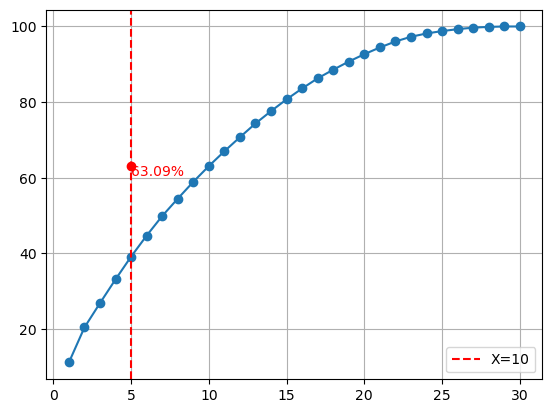

In [139]:
var = pca.explained_variance_ratio_
print(var)
sum_var = np.cumsum(var)
sum_var_percent = np.round(sum_var, decimals=4)*100
# Gráfico de la varianza acumulada, esto me indica cuanta varianza explica cada componente principal acumulativamente.
plt.grid()
plt.plot(range(1, len(var) + 1), sum_var_percent, marker='o')
plt.axvline(x=5, color='red', linestyle='--', label='X=10')
y_value = sum_var_percent[9]  # recuerda que Python indexa desde 0
plt.scatter(5, y_value, color='red', zorder=5)
plt.text(5, y_value-2.5, f"{y_value:.2f}%", color="red")
plt.legend()
plt.show()

In [140]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
    
knn = KNeighborsClassifier(n_neighbors=5)  # valor temporal de n_neighbors
knn.fit(X_pca, y_train_p)
X_scal_test = scaler.transform(x_test_p) 
X_pca_test = pca.transform(X_scal_test)
score = knn.score(X_pca_test, y_test_p)
print('Test set accuracy:', score)  

Test set accuracy: 0.6896551724137931


In [141]:
pred = knn.predict(X_pca_test)
pred_df = pd.DataFrame(pred, columns=['prediccion'])
pred_df['real'] = y_test_p.reset_index(drop=True)
confusion_matrix2 = pd.crosstab(pred_df.prediccion, pred_df.real, rownames=['Prediccion'], colnames=['Real'])
confusion_matrix2

Real,0,1
Prediccion,,
0,17,6
1,3,3


In [142]:
probs = knn.predict_proba(X_pca_test)

In [143]:
prob_df = pd.DataFrame(probs)
prob_df['actual'] = y_test

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for th in thresholds:
    prob_df['prediccion'] = np.where(prob_df[0] > th, 1, 0)
    cm = pd.crosstab(prob_df.prediccion, prob_df.actual,
                     rownames=['Prediccion'], colnames=['Actual'])
    print(f"\nThreshold = {th}")
    print(cm)


Threshold = 0.1
Actual      0.0  1.0
Prediccion          
1             6    4

Threshold = 0.2
Actual      0.0  1.0
Prediccion          
1             6    4

Threshold = 0.3
Actual      0.0  1.0
Prediccion          
1             6    4

Threshold = 0.4
Actual      0.0  1.0
Prediccion          
0             1    0
1             5    4

Threshold = 0.5
Actual      0.0  1.0
Prediccion          
0             1    0
1             5    4

Threshold = 0.6
Actual      0.0  1.0
Prediccion          
0             4    3
1             2    1

Threshold = 0.7
Actual      0.0  1.0
Prediccion          
0             4    3
1             2    1

Threshold = 0.8
Actual      0.0  1.0
Prediccion          
0             6    4

Threshold = 0.9
Actual      0.0  1.0
Prediccion          
0             6    4


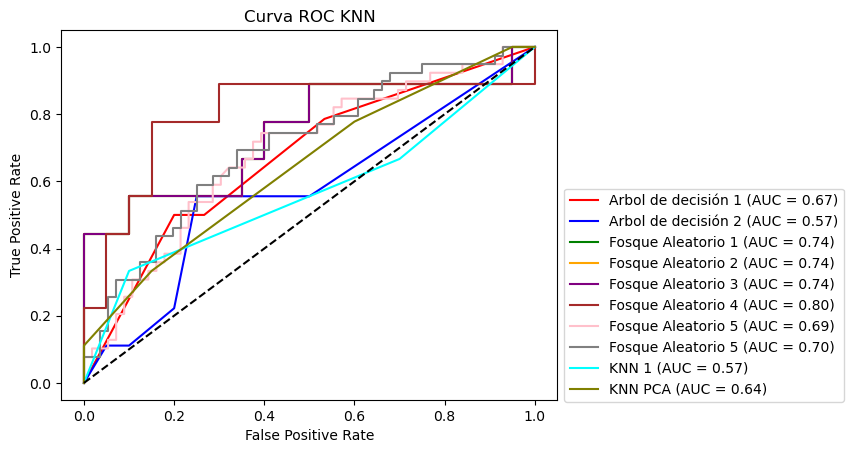

In [154]:

from sklearn.metrics import roc_curve, auc

# Suponiendo que knn ya está entrenado

fpr_a, tpr_a, thresholds_a = roc_curve(y_test, y_prob)
roc_auc_a = auc(fpr_a, tpr_a)


fpr_v, tpr_v, thresholds_v = roc_curve(y_test_v, y_prob_v)
roc_auc_v = auc(fpr_v, tpr_v)


fpr_f, tpr_f, thresholds_f = roc_curve(y_test_v, y_prob_f)
roc_auc_f = auc(fpr_f, tpr_f)

fpr_f2, tpr_f2, thresholds_f2 = roc_curve(y_test_v, y_prob_f2)
roc_auc_f2 = auc(fpr_f2, tpr_f2)

fpr_f3, tpr_f3, thresholds_f3 = roc_curve(y_test_v, y_prob_f3)
roc_auc_f3 = auc(fpr_f3, tpr_f3)

fpr_f4, tpr_f4, thresholds_f4 = roc_curve(y_test_f, y_prob_f4)
roc_auc_f4 = auc(fpr_f4, tpr_f4)

fpr_bavc, tpr_bavc, thresholds_bavc = roc_curve(y_v2, y_proba_bavc)
roc_auc_bavc = auc(fpr_bavc, tpr_bavc)

fpr_bavc2, tpr_bavc2, thresholds_bavc2 = roc_curve(y_v2, y_proba_bavc2)
roc_auc_bavc2 = auc(fpr_bavc2, tpr_bavc2)

probs_knn_c= knn_classifier.predict_proba(x_test_scal)[:, 1]
fpr_knn_c, tpr_knn_c, thresholds_knn_c = roc_curve(y_test_knn, probs_knn_c)
roc_auc_knn_c = auc(fpr_knn_c, tpr_knn_c)

  # probabilidades de clase positiva
fpr_pca, tpr_pca, thresholds_pca = roc_curve(y_test_p, probs[:, 1])
roc_auc_pca = auc(fpr_pca, tpr_pca)

plt.figure()
plt.plot(fpr_a, tpr_a, color='red', label=f'Arbol de decisión 1 (AUC = {roc_auc_a:.2f})')
plt.plot(fpr_v, tpr_v, color='blue', label=f'Arbol de decisión 2 (AUC = {roc_auc_v:.2f})')
plt.plot(fpr_f, tpr_f, color='green', label=f'Fosque Aleatorio 1 (AUC = {roc_auc_f:.2f})')
plt.plot(fpr_f2, tpr_f2, color='orange', label=f'Fosque Aleatorio 2 (AUC = {roc_auc_f2:.2f})')
plt.plot(fpr_f3, tpr_f3, color='purple', label=f'Fosque Aleatorio 3 (AUC = {roc_auc_f3:.2f})')
plt.plot(fpr_f4, tpr_f4, color='brown', label=f'Fosque Aleatorio 4 (AUC = {roc_auc_f4:.2f})')
plt.plot(fpr_bavc, tpr_bavc, color='pink', label=f'Fosque Aleatorio 5 (AUC = {roc_auc_bavc:.2f})')
plt.plot(fpr_bavc2, tpr_bavc2, color='gray', label=f'Fosque Aleatorio 5 (AUC = {roc_auc_bavc2:.2f})')
plt.plot(fpr_knn_c, tpr_knn_c, color='cyan', label=f'KNN 1 (AUC = {roc_auc_knn_c:.2f})')
plt.plot(fpr_pca, tpr_pca, color='olive', label=f'KNN PCA (AUC = {roc_auc_pca:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC KNN')
plt.legend(bbox_to_anchor=(1, 0.59), loc='upper left')

In [155]:
j_f4 = tpr_f4 - fpr_f4
T = thresholds_f4[np.argmax(j_f4)]

prob_f4 = pd.DataFrame(y_prob_f4)
prob_f4['prediccion'] = np.where(prob_f4[0]>T, 1, 0)
prob_f4['actual'] = y_test_f.reset_index(drop=True)
matriz_confucion_f4 = pd.crosstab(prob_f4.prediccion, prob_f4.actual, rownames=['Prediccion'], colnames=['Actual'])
matriz_confucion_f4

Actual,0,1
Prediccion,,
0,17,3
1,3,6


In [210]:
clinic_d.head()

,Patient ID,Survival time (days),"Event (death: 1, alive: 0)",Tumor size (cm),Grade,Stage (TNM 8th edition),Age,Sex,Cigarette,Pack per year,batch,EGFR,KRAS,Adjuvante
0,P109342,2329,1,2.6,3,IB,67,Male,Former,50.0,1,Exon 21 (L858R),G13C,None
1,P124450,2532,0,3.5,3,IB,68,Female,Former,52.5,1,Negative,Negative,None
2,P131833,2271,0,2.0,2,IA2,80,Female,Never,0.0,1,Negative,Negative,None
3,P131888,2193,0,3.0,2,IA3,63,Male,Former,47.0,1,Negative,G12C,None
4,P131946,2387,0,4.0,2,IIIA,88,Female,Never,0.0,1,Negative,Negative,None


# Regresion lineal tiempo de vida

In [249]:
x_rl = clinic_d[['Tumor size (cm)', 'Grade', 'Stage (TNM 8th edition)', 'Sex', 'Age', 'batch',
        'Pack per year', 'EGFR', 'KRAS']]
y_rl = clinic_d['Survival time (days)']

categorical_rl = x_rl.select_dtypes(include=['object']).columns

for categoria in categorical_rl:
    dummies = pd.get_dummies(
        x_rl[categoria],
        prefix=categoria,
        drop_first=True,
        dtype=int  # <--- aquí fuerzas que sean 0/1 numéricos
    )
    x_rl = pd.concat([x_rl, dummies], axis=1)

x_rl.drop(categorical_rl, axis=1, inplace=True)
x_rl.head()

,Tumor size (cm),Grade,Age,batch,Pack per year,Stage (TNM 8th edition)_IA3,Stage (TNM 8th edition)_IB,Stage (TNM 8th edition)_IIA,Stage (TNM 8th edition)_IIB,Stage (TNM 8th edition)_IIIA,...,KRAS_G12C,KRAS_G12D,KRAS_G12F,KRAS_G12R,KRAS_G12V,KRAS_G13C,KRAS_G13D,KRAS_G13F,KRAS_G13R,KRAS_Negative
0,2.6,3,67,1,50.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.5,3,68,1,52.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,2,80,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,2,63,1,47.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4.0,2,88,1,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [252]:

x_train_rl, x_test_rl, y_train_rl, y_test_rl = train_test_split(
    x_rl, y_rl, test_size=0.3, random_state=10)
# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train_rl)

# Optimizar número de componentes PCA
componentes = [5, 10, 15, 20, 25, 30]  # probar varios
pca_scores = []

for n in componentes:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    
    knn = KNeighborsClassifier(n_neighbors=5)  # valor temporal de n_neighbors
    score = cross_val_score(knn, X_pca, y_train_rl, cv=2, scoring='accuracy').mean()
    pca_scores.append(score)

# Elegir el menor número de componentes con buen score
mejor_n_components = componentes[np.argmax(pca_scores)]
print("Mejor n_components:", mejor_n_components)


Mejor n_components: 5


c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [253]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)
    
lr = LinearRegression()  # valor temporal de n_neighbors
lr.fit(X_pca, y_train_rl)
X_scal_test = scaler.transform(x_test_rl) 
X_pca_test = pca.transform(X_scal_test)
score = lr.score(X_pca_test, y_test_rl)
print('Test set accuracy:', score)  
pred = lr.predict(X_pca_test)


Test set accuracy: -0.41686580124964134


In [254]:
print('Mean: {:.2f}'.format(y_test_rl.mean()))

# imprime las métricas principales
print('EAM: {:.2f}'.format(mean_absolute_error(y_test_rl, pred)))
print('ECM: {:.2f}'.format(mean_squared_error(y_test_rl, pred)))
print('R2: {:.2f}'.format(r2_score(y_test_rl, pred)))

Mean: 1519.17
EAM: 737.98
ECM: 782819.05
R2: -0.42


In [255]:
df = pd.DataFrame(pred, columns=['prediccion'])
df['real'] = y_test_rl.reset_index(drop=True)
df.shape


(29, 2)

In [204]:
pred

array([2187.62430562, 1572.71485108, 1131.99155601, 1174.6753138 ,
       2306.57899924, 2606.70178432,  772.44306938, 1995.76475297,
        568.13224781, 2386.68724953, 1102.66775233, 1995.76475297,
       1744.18124048, 1453.64122956, 1353.66501487, 2154.85925944,
        990.29454565, 1766.02670997, 1580.25933057, 2425.00750317,
       1761.00441453, 2182.08505876,  954.39755531, 1575.20232545,
       1348.52013149,  706.92987327,  990.56951415, 1332.46163193,
       2071.34208489])

In [256]:
df.head(30)

,prediccion,real
0,2356.676380,2256
1,1804.375585,1579
2,1477.900468,2193
3,970.538673,66
4,2478.303199,1922
5,2420.411619,208
6,628.253746,1935
7,1711.915106,228
8,435.830964,2059
9,2394.430706,1868


In [221]:
x_rl.shape

(95, 32)

In [223]:
# Definir modelo
linear_model = LinearRegression()

# Definir validación cruzada estratificada (5 particiones)
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Evaluar con cross_val_score
y_pred_rl = cross_val_predict(linear_model, x_rl, y_rl, cv=cv, method='predict')

c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [224]:
print('Mean: {:.2f}'.format(y_rl.mean()))

# imprime las métricas principales
print('EAM: {:.2f}'.format(mean_absolute_error(y_rl, y_pred_rl)))
print('ECM: {:.2f}'.format(mean_squared_error(y_rl, y_pred_rl)))
print('R2: {:.2f}'.format(r2_score(y_rl, y_pred_rl)))

Mean: 1471.52
EAM: 807.74
ECM: 978085.64
R2: -1.13


In [225]:
df2 = pd.DataFrame(y_pred_rl, columns=['prediccion'])
df2['real'] = y_rl.reset_index(drop=True)
df2.shape


(95, 2)

In [226]:
df2

,prediccion,real
0,1117.352543,2329
1,1950.615272,2532
2,1944.996763,2271
3,923.227588,2193
4,2042.564577,2387
...,...,...
90,1658.337937,1919
91,848.618158,1911
92,849.674101,1935
93,452.824377,1760


In [227]:
from sklearn.ensemble import RandomForestRegressor

In [257]:
forest_br = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=5000)

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Evaluar con cross_val_score
y_pred_br = cross_val_predict(forest_br, x_rl, y_rl, cv=cv, method='predict')


c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [258]:
df_br = pd.DataFrame(y_pred_br, columns=['prediccion'])
df_br['real'] = y_rl.reset_index(drop=True)
df_br

,prediccion,real
0,1850.0020,2329
1,1509.4782,2532
2,2079.2784,2271
3,1784.7546,2193
4,1983.2692,2387
...,...,...
90,1549.6558,1919
91,1430.2062,1911
92,1044.0428,1935
93,1375.2312,1760


In [250]:
forest_br.fit(x_rl, y_rl)
df_br2 = pd.DataFrame(forest_br.oob_prediction_, columns=['prediccion'])
df_br2['real'] = y_rl.reset_index(drop=True)
df_br2

,prediccion,real
0,1869.994143,2329
1,1960.614843,2532
2,2210.956780,2271
3,1531.920938,2193
4,1959.352503,2387
...,...,...
90,1628.549013,1919
91,1440.081868,1911
92,828.939276,1935
93,1574.861273,1760


In [251]:
forest_br.oob_score_

0.16804832079329024